# Deep Learning
With Python: TensorFlow, Keras 
    
    AUTHOR: Dr. Roy Jafari 

## Video 3: Deep Learning Prediction via Keras and Tensorflow

## Import required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

## Understading the Problem

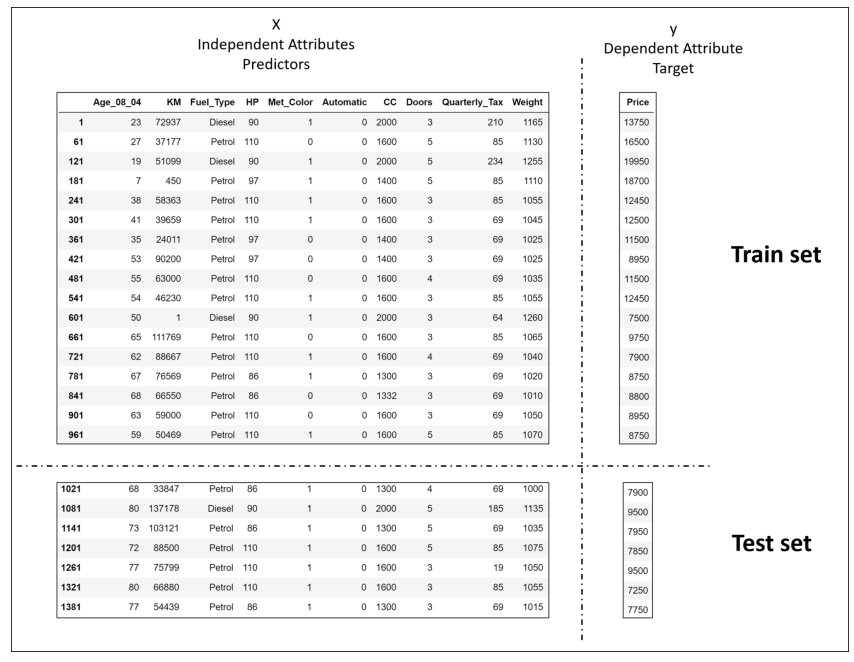

In [2]:
img = mpimg.imread('TrainTestSpilit.png')
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

## From other videos:

- YouTube Video: [Get To Know ToyotaCorolla.csv](https://youtu.be/jgrZMPC3c38)
- YouTube Video: [Prediction using Linear Regression - Predict Car Price](https://youtu.be/qzhB8qWoVvo)

## Also useful:
- YouTube Video: [The concept of prediction in the context of Data Mining](https://youtu.be/nfgVqyk65r8)
- YouTube Video: [Prediction VS. Forecasting](https://youtu.be/D7DWScjQ1FQ)

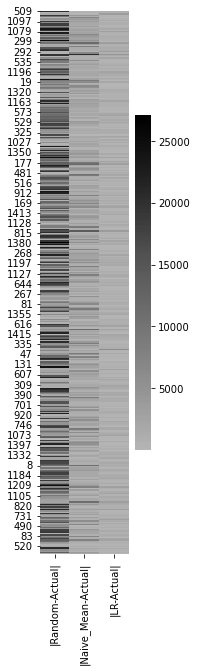

In [3]:
car_df = pd.read_csv('ToyotaCorolla.csv')
Selcelted_Columns = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'CC', 
              'Doors', 'Quarterly_Tax', 'Weight','Price']

car_df = car_df[Selcelted_Columns]
predictors = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Quarterly_Tax', 'Weight']
target = 'Price'

Data_X = pd.get_dummies(car_df[predictors], drop_first=True).drop(columns = ['Fuel_Type_Diesel'])
Data_y = car_df.Price

X_train, X_test, y_train, y_test = train_test_split(Data_X,Data_y,  test_size=0.3, random_state=1)

result_df = pd.DataFrame(index=X_test.index, columns=['Random','Naive_Mean','LR','Actual'])
result_df.Actual = y_test

# Method: Naive Mean
result_df.Naive_Mean = y_train.mean()

# Method: Random
result_df.Random = np.random.uniform(y_train.min(), y_train.max(),y_test.shape)

#Method: LR
car_lm = LinearRegression()
car_lm.fit(X_train, y_train)
result_df.LR =car_lm.predict(X_test)


result_df['|Random-Actual|'] = abs(result_df.Random-result_df.Actual)
result_df['|Naive_Mean-Actual|'] = abs(result_df.Naive_Mean-result_df.Actual)
result_df['|LR-Actual|'] = abs(result_df.LR-result_df.Actual)


table = result_df[['|Random-Actual|','|Naive_Mean-Actual|','|LR-Actual|']]

plt.figure(figsize=(2,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()

In [4]:
metric_df = pd.DataFrame(index = ['ME','RMSE', 'MAE','MAPE'] ,
                         columns = ['Random','Naive_Mean','LR'])

n_test = len(result_df)

for m in metric_df.columns:
    metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
    metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
    metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
    metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100
metric_df

,Random,Naive_Mean,LR
ME,-7824.392885,-79.93425,101.679615
RMSE,11943.44647,3560.136378,1247.107503
MAE,9717.427744,2616.745368,966.948202
MAPE,103.879074,24.851242,9.659892


# From Another Video:
 - YouTube Video: [Prediction using Artificial Neural Network (MLP) - Predict Car Price](https://youtu.be/YhRfvZzO7a0)
 
If you don't know what's MLP and would like to learn about the idea behind it:
- YouTube Video: [A high-level and intuitive explanation of Multilayer Perceptron (MLP) an Artificial Neural Network](https://youtu.be/4Txy59MY6xg)

# MLP

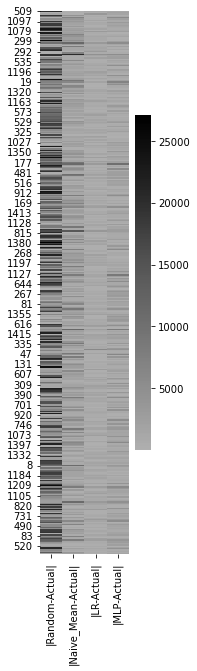

In [5]:
car_mlp = MLPRegressor(random_state=10)
car_mlp.fit(X_train, y_train)

result_df['MLP'] = car_mlp.predict(X_test)
result_df['|MLP-Actual|'] = abs(result_df.MLP-result_df.Actual)

table = result_df[['|Random-Actual|','|Naive_Mean-Actual|','|LR-Actual|','|MLP-Actual|']]

plt.figure(figsize=(2,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()

In [6]:
m='MLP'

metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100

metric_df

,Random,Naive_Mean,LR,MLP
ME,-7824.392885,-79.93425,101.679615,791.117902
RMSE,11943.44647,3560.136378,1247.107503,2251.011827
MAE,9717.427744,2616.745368,966.948202,1699.572476
MAPE,103.879074,24.851242,9.659892,15.187355


## What is Random_State?

- YouTubeVideo: [What is random_state? Python Machine Learning algorithms all have it](https://youtu.be/rArvRWyH5Sk)

# Tune MLP

MLP is a random and complex model. For its successful application some levels of tuning is necessary.

The following are different parameters that can be tuned:

    - hidden_layer_sizes 
    - activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
        Activation function for the hidden layer.
    - solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
    - alpha, default=0.0001
    - learning_rate{‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’
    - learning_rate_init, default=0.001
    - max_iter, default=200
    - shuffle, default=True
    
To tune MLP, we cannot use the testset. Why? 

So we chunk out another part of trainset as a tuning (validation) set. We use this set only tune the algorithm.

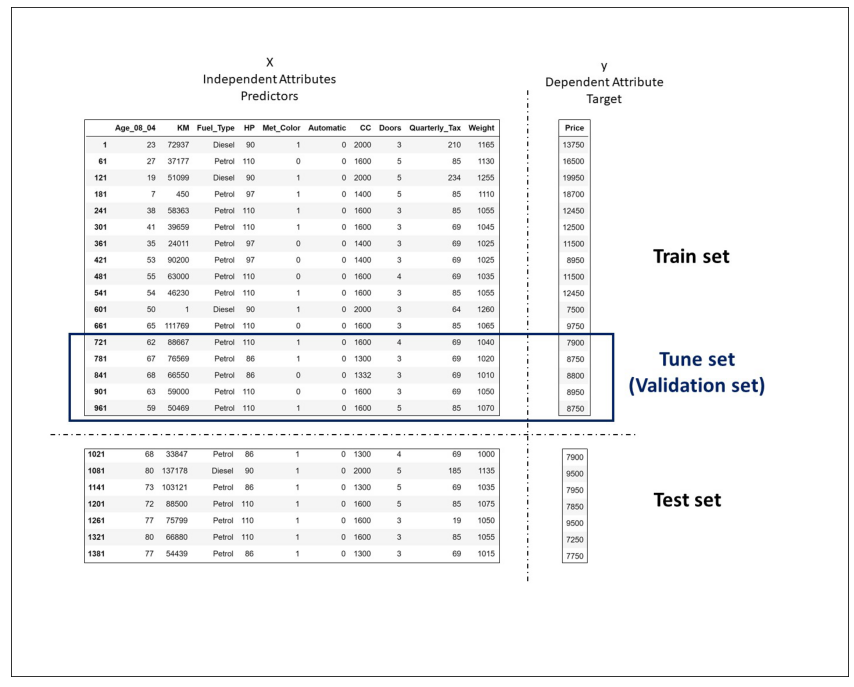

In [7]:
img = mpimg.imread('TrainTuneTestSplit.jpg')
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

In [8]:
# Create tuning (validation) set: devide the trainset

X_train_s, X_tune, y_train_s, y_tune = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)

print('X_train_s Shape: ', X_train_s.shape)
print('X_tune Shape: ', X_tune.shape)
print('y_train_s Shape: ', y_train_s.shape)
print('y_tune Shape: ', y_tune.shape)

X_train Shape:  (1005, 6)
y_train Shape:  (1005,)
X_train_s Shape:  (804, 6)
X_tune Shape:  (201, 6)
y_train_s Shape:  (804,)
y_tune Shape:  (201,)


# Train the tuned MLP on train set

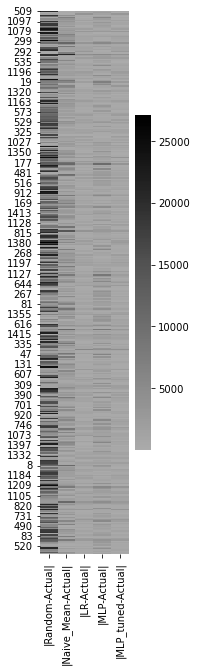

In [9]:
car_mlp = MLPRegressor(hidden_layer_sizes=(8), max_iter=2000,
                           activation='relu',solver='lbfgs', learning_rate='constant',
                           learning_rate_init= 0.1, alpha = 0.00010, shuffle = False,random_state=4)

car_mlp.fit(X_train_s, y_train_s)
result_df['MLP_tuned'] = car_mlp.predict(X_test)
result_df['|MLP_tuned-Actual|'] = abs(result_df.MLP_tuned-result_df.Actual)

table = result_df[['|Random-Actual|','|Naive_Mean-Actual|','|LR-Actual|','|MLP-Actual|','|MLP_tuned-Actual|']]

plt.figure(figsize=(2,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()

In [10]:
m='MLP_tuned'

metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100

metric_df

,Random,Naive_Mean,LR,MLP,MLP_tuned
ME,-7824.392885,-79.93425,101.679615,791.117902,132.046176
RMSE,11943.44647,3560.136378,1247.107503,2251.011827,1258.040377
MAE,9717.427744,2616.745368,966.948202,1699.572476,988.123084
MAPE,103.879074,24.851242,9.659892,15.187355,9.956320


# New Material

- **What are we trying to do?** redo what we did with `MLPRegressor` from `sklearn.neural_network` using `Keras` from `tensorflow`
- **Why?** `MLPRegressor` is great because it is managed at very high-level, but doesn not lend itself for lower-level manipulaitons, but `Keras` is designed to give both higher level and lower-level access. 

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

keras_model =  keras.Sequential([
    layers.Dense(8,activation='relu'),
    layers.Dense(1)
])
keras_model.compile(optimizer='rmsprop',loss='mse')

In [12]:
keras_model.fit(X_train, y_train,epochs=2000,batch_size = len(X_train),verbose=0)

14/14 [==============================] - 0s 2ms/step


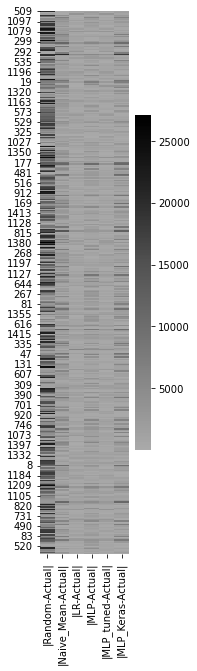

In [13]:
result_df['MLP_Keras'] = keras_model.predict(X_test)
result_df['|MLP_Keras-Actual|'] = abs(result_df.MLP_Keras-result_df.Actual)

table = result_df[['|Random-Actual|','|Naive_Mean-Actual|','|LR-Actual|',
                   '|MLP-Actual|','|MLP_tuned-Actual|','|MLP_Keras-Actual|']]

plt.figure(figsize=(2,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()

In [14]:
m='MLP_Keras'

metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100

metric_df

,Random,Naive_Mean,LR,MLP,MLP_tuned,MLP_Keras
ME,-7824.392885,-79.93425,101.679615,791.117902,132.046176,1063.664113
RMSE,11943.44647,3560.136378,1247.107503,2251.011827,1258.040377,3277.575831
MAE,9717.427744,2616.745368,966.948202,1699.572476,988.123084,2186.430339
MAPE,103.879074,24.851242,9.659892,15.187355,9.956320,18.269077


## Adding Validation
## Taking advantage of history

In [15]:
keras_model =  keras.Sequential([
    layers.Dense(8,activation='relu'),
    layers.Dense(1)
])
keras_model.compile(optimizer='rmsprop',loss='mse',metrics=['mape'])
history = keras_model.fit(X_train_s, y_train_s,epochs=2000,batch_size = len(X_train_s),
                validation_data=(X_tune,y_tune))

Epoch 1/2000
1/1 [==============================] - 1s 700ms/step - loss: 2160078592.0000 - mape: 435.0597 - val_loss: 2301696768.0000 - val_mape: 459.0813
Epoch 2/2000
1/1 [==============================] - 0s 33ms/step - loss: 2076143488.0000 - mape: 426.1712 - val_loss: 2237110528.0000 - val_mape: 452.3354
Epoch 3/2000
1/1 [==============================] - 0s 48ms/step - loss: 2017291392.0000 - mape: 419.8308 - val_loss: 2184314880.0000 - val_mape: 446.7461
Epoch 4/2000
1/1 [==============================] - 0s 48ms/step - loss: 1969189760.0000 - mape: 414.5791 - val_loss: 2138369408.0000 - val_mape: 441.8251
Epoch 5/2000
1/1 [==============================] - 0s 50ms/step - loss: 1927335552.0000 - mape: 409.9553 - val_loss: 2096993920.0000 - val_mape: 437.3467
Epoch 6/2000
1/1 [==============================] - 0s 48ms/step - loss: 1889648768.0000 - mape: 405.7474 - val_loss: 2058923008.0000 - val_mape: 433.1856
Epoch 7/2000
1/1 [==============================] - 0s 47ms/step - lo

1/1 [==============================] - 0s 49ms/step - loss: 942522304.0000 - mape: 281.6795 - val_loss: 1039346176.0000 - val_mape: 302.1765
Epoch 54/2000
1/1 [==============================] - 0s 51ms/step - loss: 928317760.0000 - mape: 279.4301 - val_loss: 1023824512.0000 - val_mape: 299.7865
Epoch 55/2000
1/1 [==============================] - 0s 45ms/step - loss: 914254976.0000 - mape: 277.1868 - val_loss: 1008455936.0000 - val_mape: 297.4012
Epoch 56/2000
1/1 [==============================] - 0s 38ms/step - loss: 900332160.0000 - mape: 274.9481 - val_loss: 993239168.0000 - val_mape: 295.0228
Epoch 57/2000
1/1 [==============================] - 0s 31ms/step - loss: 886548928.0000 - mape: 272.7149 - val_loss: 978172224.0000 - val_mape: 292.6529
Epoch 58/2000
1/1 [==============================] - 0s 31ms/step - loss: 872903488.0000 - mape: 270.4858 - val_loss: 963254656.0000 - val_mape: 290.2873
Epoch 59/2000
1/1 [==============================] - 0s 48ms/step - loss: 859394944.000

1/1 [==============================] - 0s 46ms/step - loss: 368234304.0000 - mape: 170.1565 - val_loss: 410006016.0000 - val_mape: 184.9103
Epoch 107/2000
1/1 [==============================] - 0s 46ms/step - loss: 360641600.0000 - mape: 168.2262 - val_loss: 401644352.0000 - val_mape: 182.8774
Epoch 108/2000
1/1 [==============================] - 0s 48ms/step - loss: 353158112.0000 - mape: 166.3037 - val_loss: 393402432.0000 - val_mape: 180.8489
Epoch 109/2000
1/1 [==============================] - 0s 55ms/step - loss: 345783168.0000 - mape: 164.3866 - val_loss: 385280960.0000 - val_mape: 178.8251
Epoch 110/2000
1/1 [==============================] - 0s 44ms/step - loss: 338517216.0000 - mape: 162.4743 - val_loss: 377277920.0000 - val_mape: 176.8058
Epoch 111/2000
1/1 [==============================] - 0s 44ms/step - loss: 331358080.0000 - mape: 160.5731 - val_loss: 369393344.0000 - val_mape: 174.7955
Epoch 112/2000
1/1 [==============================] - 0s 43ms/step - loss: 324307840.

1/1 [==============================] - 0s 46ms/step - loss: 106112608.0000 - mape: 82.4592 - val_loss: 119448920.0000 - val_mape: 90.8813
Epoch 160/2000
1/1 [==============================] - 0s 42ms/step - loss: 103647776.0000 - mape: 81.1869 - val_loss: 116652776.0000 - val_mape: 89.4746
Epoch 161/2000
1/1 [==============================] - 0s 31ms/step - loss: 101252496.0000 - mape: 79.9724 - val_loss: 113957744.0000 - val_mape: 88.0212
Epoch 162/2000
1/1 [==============================] - 0s 27ms/step - loss: 98943968.0000 - mape: 78.7191 - val_loss: 111335872.0000 - val_mape: 86.6600
Epoch 163/2000
1/1 [==============================] - 0s 22ms/step - loss: 96705784.0000 - mape: 77.5461 - val_loss: 108805040.0000 - val_mape: 85.2530
Epoch 164/2000
1/1 [==============================] - 0s 31ms/step - loss: 94548800.0000 - mape: 76.3206 - val_loss: 106353680.0000 - val_mape: 83.9645
Epoch 165/2000
1/1 [==============================] - 0s 47ms/step - loss: 92463616.0000 - mape: 75.

1/1 [==============================] - 0s 41ms/step - loss: 56223148.0000 - mape: 49.6999 - val_loss: 60932932.0000 - val_mape: 51.1924
Epoch 214/2000
1/1 [==============================] - 0s 33ms/step - loss: 56171544.0000 - mape: 49.7065 - val_loss: 60789348.0000 - val_mape: 50.9456
Epoch 215/2000
1/1 [==============================] - 0s 39ms/step - loss: 56106224.0000 - mape: 49.6024 - val_loss: 60708876.0000 - val_mape: 50.8238
Epoch 216/2000
1/1 [==============================] - 0s 36ms/step - loss: 56063668.0000 - mape: 49.5469 - val_loss: 60662596.0000 - val_mape: 50.8164
Epoch 217/2000
1/1 [==============================] - 0s 44ms/step - loss: 56018800.0000 - mape: 49.5301 - val_loss: 60570184.0000 - val_mape: 50.6820
Epoch 218/2000
1/1 [==============================] - 0s 45ms/step - loss: 55971512.0000 - mape: 49.4694 - val_loss: 60491108.0000 - val_mape: 50.5656
Epoch 219/2000
1/1 [==============================] - 0s 44ms/step - loss: 55928720.0000 - mape: 49.4153 - va

1/1 [==============================] - 0s 50ms/step - loss: 53518876.0000 - mape: 47.8428 - val_loss: 57866856.0000 - val_mape: 49.2829
Epoch 268/2000
1/1 [==============================] - 0s 37ms/step - loss: 53470536.0000 - mape: 48.0479 - val_loss: 57723284.0000 - val_mape: 48.9584
Epoch 269/2000
1/1 [==============================] - 0s 43ms/step - loss: 53436144.0000 - mape: 47.9181 - val_loss: 57748820.0000 - val_mape: 49.1076
Epoch 270/2000
1/1 [==============================] - 0s 40ms/step - loss: 53404352.0000 - mape: 47.9636 - val_loss: 57677912.0000 - val_mape: 48.9836
Epoch 271/2000
1/1 [==============================] - 0s 46ms/step - loss: 53373052.0000 - mape: 47.9072 - val_loss: 57672196.0000 - val_mape: 49.0447
Epoch 272/2000
1/1 [==============================] - 0s 45ms/step - loss: 53341824.0000 - mape: 47.9191 - val_loss: 57616576.0000 - val_mape: 48.9639
Epoch 273/2000
1/1 [==============================] - 0s 51ms/step - loss: 53310552.0000 - mape: 47.8786 - va

1/1 [==============================] - 0s 44ms/step - loss: 51779188.0000 - mape: 46.9875 - val_loss: 56061028.0000 - val_mape: 48.4146
Epoch 322/2000
1/1 [==============================] - 0s 39ms/step - loss: 51748196.0000 - mape: 47.1296 - val_loss: 55849928.0000 - val_mape: 47.8806
Epoch 323/2000
1/1 [==============================] - 0s 43ms/step - loss: 51718756.0000 - mape: 46.9196 - val_loss: 56048968.0000 - val_mape: 48.5238
Epoch 324/2000
1/1 [==============================] - 0s 46ms/step - loss: 51692244.0000 - mape: 47.1466 - val_loss: 55744868.0000 - val_mape: 47.7015
Epoch 325/2000
1/1 [==============================] - 0s 46ms/step - loss: 51668868.0000 - mape: 46.8280 - val_loss: 56108780.0000 - val_mape: 48.7757
Epoch 326/2000
1/1 [==============================] - 0s 42ms/step - loss: 51660052.0000 - mape: 47.2223 - val_loss: 55652904.0000 - val_mape: 47.5754
Epoch 327/2000
1/1 [==============================] - 0s 54ms/step - loss: 51618072.0000 - mape: 46.7578 - va

1/1 [==============================] - 0s 47ms/step - loss: 49972156.0000 - mape: 45.9640 - val_loss: 54183020.0000 - val_mape: 47.5469
Epoch 376/2000
1/1 [==============================] - 0s 36ms/step - loss: 49941484.0000 - mape: 46.1709 - val_loss: 53919216.0000 - val_mape: 46.8278
Epoch 377/2000
1/1 [==============================] - 0s 40ms/step - loss: 49913600.0000 - mape: 45.8853 - val_loss: 54209072.0000 - val_mape: 47.7421
Epoch 378/2000
1/1 [==============================] - 0s 51ms/step - loss: 49895980.0000 - mape: 46.2257 - val_loss: 53815504.0000 - val_mape: 46.6539
Epoch 379/2000
1/1 [==============================] - 0s 52ms/step - loss: 49864832.0000 - mape: 45.7926 - val_loss: 54184432.0000 - val_mape: 47.8110
Epoch 380/2000
1/1 [==============================] - 0s 44ms/step - loss: 49841656.0000 - mape: 46.2306 - val_loss: 53748212.0000 - val_mape: 46.6779
Epoch 381/2000
1/1 [==============================] - 0s 44ms/step - loss: 49785516.0000 - mape: 45.7801 - va

1/1 [==============================] - 0s 26ms/step - loss: 48084904.0000 - mape: 44.8505 - val_loss: 52305628.0000 - val_mape: 46.8446
Epoch 430/2000
1/1 [==============================] - 0s 58ms/step - loss: 48077148.0000 - mape: 45.2452 - val_loss: 51872756.0000 - val_mape: 45.6460
Epoch 431/2000
1/1 [==============================] - 0s 53ms/step - loss: 48032172.0000 - mape: 44.7568 - val_loss: 52179036.0000 - val_mape: 46.6888
Epoch 432/2000
1/1 [==============================] - 0s 46ms/step - loss: 47990576.0000 - mape: 45.1582 - val_loss: 51817436.0000 - val_mape: 45.7407
Epoch 433/2000
1/1 [==============================] - 0s 43ms/step - loss: 47939712.0000 - mape: 44.7681 - val_loss: 52006744.0000 - val_mape: 46.4226
Epoch 434/2000
1/1 [==============================] - 0s 43ms/step - loss: 47895920.0000 - mape: 45.0234 - val_loss: 51774276.0000 - val_mape: 45.8309
Epoch 435/2000
1/1 [==============================] - 0s 42ms/step - loss: 47855704.0000 - mape: 44.7744 - va

1/1 [==============================] - 0s 28ms/step - loss: 46100252.0000 - mape: 43.6714 - val_loss: 50255356.0000 - val_mape: 45.9229
Epoch 484/2000
1/1 [==============================] - 0s 43ms/step - loss: 46106740.0000 - mape: 44.1839 - val_loss: 49742232.0000 - val_mape: 44.4661
Epoch 485/2000
1/1 [==============================] - 0s 46ms/step - loss: 46043784.0000 - mape: 43.5788 - val_loss: 50046796.0000 - val_mape: 45.5682
Epoch 486/2000
1/1 [==============================] - 0s 44ms/step - loss: 45989632.0000 - mape: 44.0149 - val_loss: 49699616.0000 - val_mape: 44.6586
Epoch 487/2000
1/1 [==============================] - 0s 43ms/step - loss: 45933572.0000 - mape: 43.6242 - val_loss: 49853792.0000 - val_mape: 45.2526
Epoch 488/2000
1/1 [==============================] - 0s 42ms/step - loss: 45888068.0000 - mape: 43.8543 - val_loss: 49655792.0000 - val_mape: 44.7580
Epoch 489/2000
1/1 [==============================] - 0s 43ms/step - loss: 45846636.0000 - mape: 43.6337 - va

1/1 [==============================] - 0s 43ms/step - loss: 43991368.0000 - mape: 42.4872 - val_loss: 47854204.0000 - val_mape: 44.3159
Epoch 538/2000
1/1 [==============================] - 0s 38ms/step - loss: 43961124.0000 - mape: 42.7908 - val_loss: 47548936.0000 - val_mape: 43.3521
Epoch 539/2000
1/1 [==============================] - 0s 45ms/step - loss: 43939916.0000 - mape: 42.3699 - val_loss: 47971964.0000 - val_mape: 44.7702
Epoch 540/2000
1/1 [==============================] - 0s 46ms/step - loss: 43949052.0000 - mape: 42.9562 - val_loss: 47433312.0000 - val_mape: 43.1989
Epoch 541/2000
1/1 [==============================] - 0s 43ms/step - loss: 43875620.0000 - mape: 42.2859 - val_loss: 47723688.0000 - val_mape: 44.3222
Epoch 542/2000
1/1 [==============================] - 0s 46ms/step - loss: 43814372.0000 - mape: 42.7385 - val_loss: 47391092.0000 - val_mape: 43.4202
Epoch 543/2000
1/1 [==============================] - 0s 34ms/step - loss: 43757680.0000 - mape: 42.3413 - va

1/1 [==============================] - 0s 46ms/step - loss: 41811944.0000 - mape: 41.2066 - val_loss: 45482108.0000 - val_mape: 42.9092
Epoch 592/2000
1/1 [==============================] - 0s 48ms/step - loss: 41774092.0000 - mape: 41.4221 - val_loss: 45255872.0000 - val_mape: 42.2166
Epoch 593/2000
1/1 [==============================] - 0s 45ms/step - loss: 41739800.0000 - mape: 41.1073 - val_loss: 45505196.0000 - val_mape: 43.1597
Epoch 594/2000
1/1 [==============================] - 0s 45ms/step - loss: 41720312.0000 - mape: 41.5034 - val_loss: 45141068.0000 - val_mape: 41.9395
Epoch 595/2000
1/1 [==============================] - 0s 31ms/step - loss: 41695024.0000 - mape: 40.9679 - val_loss: 45563144.0000 - val_mape: 43.4651
Epoch 596/2000
1/1 [==============================] - 0s 42ms/step - loss: 41691068.0000 - mape: 41.6153 - val_loss: 45036208.0000 - val_mape: 41.9044
Epoch 597/2000
1/1 [==============================] - 0s 44ms/step - loss: 41606540.0000 - mape: 40.9255 - va

1/1 [==============================] - 0s 45ms/step - loss: 39565056.0000 - mape: 39.8131 - val_loss: 43081036.0000 - val_mape: 41.5536
Epoch 646/2000
1/1 [==============================] - 0s 38ms/step - loss: 39525036.0000 - mape: 40.0260 - val_loss: 42873836.0000 - val_mape: 40.8790
Epoch 647/2000
1/1 [==============================] - 0s 46ms/step - loss: 39488412.0000 - mape: 39.7174 - val_loss: 43104408.0000 - val_mape: 41.8182
Epoch 648/2000
1/1 [==============================] - 0s 46ms/step - loss: 39470192.0000 - mape: 40.1202 - val_loss: 42747772.0000 - val_mape: 40.5713
Epoch 649/2000
1/1 [==============================] - 0s 45ms/step - loss: 39441572.0000 - mape: 39.5575 - val_loss: 43116388.0000 - val_mape: 42.0285
Epoch 650/2000
1/1 [==============================] - 0s 47ms/step - loss: 39422272.0000 - mape: 40.1888 - val_loss: 42648948.0000 - val_mape: 40.5151
Epoch 651/2000
1/1 [==============================] - 0s 45ms/step - loss: 39355976.0000 - mape: 39.5037 - va

1/1 [==============================] - 0s 39ms/step - loss: 37298580.0000 - mape: 38.1955 - val_loss: 40807848.0000 - val_mape: 40.6640
Epoch 700/2000
1/1 [==============================] - 0s 27ms/step - loss: 37276100.0000 - mape: 38.8087 - val_loss: 40382336.0000 - val_mape: 39.1907
Epoch 701/2000
1/1 [==============================] - 0s 32ms/step - loss: 37214844.0000 - mape: 38.1326 - val_loss: 40626232.0000 - val_mape: 40.3672
Epoch 702/2000
1/1 [==============================] - 0s 32ms/step - loss: 37158712.0000 - mape: 38.6371 - val_loss: 40309172.0000 - val_mape: 39.3021
Epoch 703/2000
1/1 [==============================] - 0s 45ms/step - loss: 37103408.0000 - mape: 38.1500 - val_loss: 40467664.0000 - val_mape: 40.1151
Epoch 704/2000
1/1 [==============================] - 0s 45ms/step - loss: 37053804.0000 - mape: 38.4885 - val_loss: 40234568.0000 - val_mape: 39.3452
Epoch 705/2000
1/1 [==============================] - 0s 46ms/step - loss: 37006976.0000 - mape: 38.1356 - va

1/1 [==============================] - 0s 49ms/step - loss: 34925788.0000 - mape: 36.7032 - val_loss: 38141136.0000 - val_mape: 38.7310
Epoch 754/2000
1/1 [==============================] - 0s 44ms/step - loss: 34875584.0000 - mape: 37.0548 - val_loss: 37920856.0000 - val_mape: 37.9478
Epoch 755/2000
1/1 [==============================] - 0s 43ms/step - loss: 34828248.0000 - mape: 36.6873 - val_loss: 38029052.0000 - val_mape: 38.6126
Epoch 756/2000
1/1 [==============================] - 0s 47ms/step - loss: 34783248.0000 - mape: 36.9683 - val_loss: 37832408.0000 - val_mape: 37.8964
Epoch 757/2000
1/1 [==============================] - 0s 46ms/step - loss: 34739584.0000 - mape: 36.6289 - val_loss: 37957968.0000 - val_mape: 38.6349
Epoch 758/2000
1/1 [==============================] - 0s 42ms/step - loss: 34700440.0000 - mape: 36.9445 - val_loss: 37730292.0000 - val_mape: 37.7410
Epoch 759/2000
1/1 [==============================] - 0s 43ms/step - loss: 34662824.0000 - mape: 36.5251 - va

1/1 [==============================] - 0s 46ms/step - loss: 32536588.0000 - mape: 35.1099 - val_loss: 35596884.0000 - val_mape: 37.1604
Epoch 808/2000
1/1 [==============================] - 0s 46ms/step - loss: 32495228.0000 - mape: 35.4474 - val_loss: 35384816.0000 - val_mape: 36.3044
Epoch 809/2000
1/1 [==============================] - 0s 46ms/step - loss: 32453066.0000 - mape: 35.0172 - val_loss: 35538876.0000 - val_mape: 37.2264
Epoch 810/2000
1/1 [==============================] - 0s 48ms/step - loss: 32416478.0000 - mape: 35.4534 - val_loss: 35283780.0000 - val_mape: 36.1138
Epoch 811/2000
1/1 [==============================] - 0s 50ms/step - loss: 32381862.0000 - mape: 34.8958 - val_loss: 35554280.0000 - val_mape: 37.5194
Epoch 812/2000
1/1 [==============================] - 0s 52ms/step - loss: 32367484.0000 - mape: 35.5828 - val_loss: 35173512.0000 - val_mape: 35.8686
Epoch 813/2000
1/1 [==============================] - 0s 40ms/step - loss: 32321818.0000 - mape: 34.7589 - va

1/1 [==============================] - 0s 45ms/step - loss: 30152146.0000 - mape: 33.3705 - val_loss: 33111164.0000 - val_mape: 35.8023
Epoch 862/2000
1/1 [==============================] - 0s 46ms/step - loss: 30126482.0000 - mape: 33.9443 - val_loss: 32825938.0000 - val_mape: 34.4302
Epoch 863/2000
1/1 [==============================] - 0s 46ms/step - loss: 30090464.0000 - mape: 33.2086 - val_loss: 33090458.0000 - val_mape: 36.0104
Epoch 864/2000
1/1 [==============================] - 0s 46ms/step - loss: 30066688.0000 - mape: 34.0291 - val_loss: 32727786.0000 - val_mape: 34.2778
Epoch 865/2000
1/1 [==============================] - 0s 36ms/step - loss: 30017300.0000 - mape: 33.1070 - val_loss: 32970616.0000 - val_mape: 35.8627
Epoch 866/2000
1/1 [==============================] - 0s 24ms/step - loss: 29968144.0000 - mape: 33.9192 - val_loss: 32637172.0000 - val_mape: 34.3341
Epoch 867/2000
1/1 [==============================] - 0s 26ms/step - loss: 29909232.0000 - mape: 33.0926 - va

1/1 [==============================] - 0s 45ms/step - loss: 27789790.0000 - mape: 31.5400 - val_loss: 30586120.0000 - val_mape: 34.2801
Epoch 916/2000
1/1 [==============================] - 0s 47ms/step - loss: 27756142.0000 - mape: 32.3417 - val_loss: 30293408.0000 - val_mape: 32.7274
Epoch 917/2000
1/1 [==============================] - 0s 46ms/step - loss: 27707158.0000 - mape: 31.4564 - val_loss: 30472176.0000 - val_mape: 34.1413
Epoch 918/2000
1/1 [==============================] - 0s 39ms/step - loss: 27660722.0000 - mape: 32.2358 - val_loss: 30203838.0000 - val_mape: 32.7114
Epoch 919/2000
1/1 [==============================] - 0s 39ms/step - loss: 27612722.0000 - mape: 31.4147 - val_loss: 30376664.0000 - val_mape: 34.0740
Epoch 920/2000
1/1 [==============================] - 0s 39ms/step - loss: 27572478.0000 - mape: 32.1702 - val_loss: 30110662.0000 - val_mape: 32.6430
Epoch 921/2000
1/1 [==============================] - 0s 40ms/step - loss: 27525576.0000 - mape: 31.3470 - va

1/1 [==============================] - 0s 53ms/step - loss: 25446110.0000 - mape: 29.7379 - val_loss: 28057578.0000 - val_mape: 32.5894
Epoch 970/2000
1/1 [==============================] - 0s 44ms/step - loss: 25404344.0000 - mape: 30.6362 - val_loss: 27793386.0000 - val_mape: 30.9673
Epoch 971/2000
1/1 [==============================] - 0s 45ms/step - loss: 25356706.0000 - mape: 29.6859 - val_loss: 27970830.0000 - val_mape: 32.5516
Epoch 972/2000
1/1 [==============================] - 0s 46ms/step - loss: 25320656.0000 - mape: 30.5866 - val_loss: 27699858.0000 - val_mape: 30.8899
Epoch 973/2000
1/1 [==============================] - 0s 47ms/step - loss: 25271606.0000 - mape: 29.6143 - val_loss: 27866924.0000 - val_mape: 32.4416
Epoch 974/2000
1/1 [==============================] - 0s 40ms/step - loss: 25229948.0000 - mape: 30.4954 - val_loss: 27609016.0000 - val_mape: 30.8527
Epoch 975/2000
1/1 [==============================] - 0s 27ms/step - loss: 25182136.0000 - mape: 29.5638 - va

1/1 [==============================] - 0s 48ms/step - loss: 23137144.0000 - mape: 28.0047 - val_loss: 25597150.0000 - val_mape: 30.9256
Epoch 1024/2000
1/1 [==============================] - 0s 46ms/step - loss: 23105246.0000 - mape: 28.9145 - val_loss: 25351700.0000 - val_mape: 29.1558
Epoch 1025/2000
1/1 [==============================] - 0s 41ms/step - loss: 23062938.0000 - mape: 27.8924 - val_loss: 25526652.0000 - val_mape: 30.9497
Epoch 1026/2000
1/1 [==============================] - 0s 45ms/step - loss: 23029614.0000 - mape: 28.9029 - val_loss: 25262450.0000 - val_mape: 29.0506
Epoch 1027/2000
1/1 [==============================] - 0s 50ms/step - loss: 22984742.0000 - mape: 27.8046 - val_loss: 25443428.0000 - val_mape: 30.9152
Epoch 1028/2000
1/1 [==============================] - 0s 45ms/step - loss: 22948726.0000 - mape: 28.8562 - val_loss: 25172748.0000 - val_mape: 28.9942
Epoch 1029/2000
1/1 [==============================] - 0s 48ms/step - loss: 22899352.0000 - mape: 27.744

1/1 [==============================] - 0s 39ms/step - loss: 20934200.0000 - mape: 26.1219 - val_loss: 23251542.0000 - val_mape: 29.4467
Epoch 1078/2000
1/1 [==============================] - 0s 47ms/step - loss: 20894964.0000 - mape: 27.2852 - val_loss: 22987202.0000 - val_mape: 27.3512
Epoch 1079/2000
1/1 [==============================] - 0s 46ms/step - loss: 20840114.0000 - mape: 26.1055 - val_loss: 23120236.0000 - val_mape: 29.1664
Epoch 1080/2000
1/1 [==============================] - 0s 55ms/step - loss: 20793664.0000 - mape: 27.0855 - val_loss: 22901338.0000 - val_mape: 27.4048
Epoch 1081/2000
1/1 [==============================] - 0s 40ms/step - loss: 20745550.0000 - mape: 26.1036 - val_loss: 23008164.0000 - val_mape: 28.9688
Epoch 1082/2000
1/1 [==============================] - 0s 44ms/step - loss: 20701992.0000 - mape: 26.9380 - val_loss: 22817510.0000 - val_mape: 27.3885
Epoch 1083/2000
1/1 [==============================] - 0s 45ms/step - loss: 20660124.0000 - mape: 26.060

1/1 [==============================] - 0s 44ms/step - loss: 18785176.0000 - mape: 24.3829 - val_loss: 20921276.0000 - val_mape: 27.6271
Epoch 1132/2000
1/1 [==============================] - 0s 45ms/step - loss: 18741572.0000 - mape: 25.4728 - val_loss: 20718516.0000 - val_mape: 25.7283
Epoch 1133/2000
1/1 [==============================] - 0s 45ms/step - loss: 18696586.0000 - mape: 24.3727 - val_loss: 20825374.0000 - val_mape: 27.4906
Epoch 1134/2000
1/1 [==============================] - 0s 45ms/step - loss: 18658382.0000 - mape: 25.3624 - val_loss: 20637218.0000 - val_mape: 25.6784
Epoch 1135/2000
1/1 [==============================] - 0s 44ms/step - loss: 18618486.0000 - mape: 24.3136 - val_loss: 20749640.0000 - val_mape: 27.4736
Epoch 1136/2000
1/1 [==============================] - 0s 41ms/step - loss: 18584424.0000 - mape: 25.3287 - val_loss: 20557134.0000 - val_mape: 25.5508
Epoch 1137/2000
1/1 [==============================] - 0s 45ms/step - loss: 18548570.0000 - mape: 24.214

1/1 [==============================] - 0s 38ms/step - loss: 16761068.0000 - mape: 22.7076 - val_loss: 18755874.0000 - val_mape: 26.0986
Epoch 1186/2000
1/1 [==============================] - 0s 33ms/step - loss: 16725919.0000 - mape: 23.9179 - val_loss: 18569900.0000 - val_mape: 24.0707
Epoch 1187/2000
1/1 [==============================] - 0s 41ms/step - loss: 16686268.0000 - mape: 22.6588 - val_loss: 18681552.0000 - val_mape: 26.0589
Epoch 1188/2000
1/1 [==============================] - 0s 44ms/step - loss: 16655015.0000 - mape: 23.8729 - val_loss: 18494058.0000 - val_mape: 23.9785
Epoch 1189/2000
1/1 [==============================] - 0s 45ms/step - loss: 16618091.0000 - mape: 22.5779 - val_loss: 18620036.0000 - val_mape: 26.1009
Epoch 1190/2000
1/1 [==============================] - 0s 44ms/step - loss: 16591709.0000 - mape: 23.8850 - val_loss: 18419614.0000 - val_mape: 23.8562
Epoch 1191/2000
1/1 [==============================] - 0s 50ms/step - loss: 16554659.0000 - mape: 22.478

1/1 [==============================] - 0s 51ms/step - loss: 14883817.0000 - mape: 21.0873 - val_loss: 16745110.0000 - val_mape: 24.6835
Epoch 1240/2000
1/1 [==============================] - 0s 46ms/step - loss: 14854610.0000 - mape: 22.4962 - val_loss: 16564156.0000 - val_mape: 22.4526
Epoch 1241/2000
1/1 [==============================] - 0s 33ms/step - loss: 14817285.0000 - mape: 21.0290 - val_loss: 16674099.0000 - val_mape: 24.6385
Epoch 1242/2000
1/1 [==============================] - 0s 45ms/step - loss: 14788500.0000 - mape: 22.4475 - val_loss: 16493162.0000 - val_mape: 22.3916
Epoch 1243/2000
1/1 [==============================] - 0s 41ms/step - loss: 14751519.0000 - mape: 20.9683 - val_loss: 16603625.0000 - val_mape: 24.5956
Epoch 1244/2000
1/1 [==============================] - 0s 46ms/step - loss: 14722789.0000 - mape: 22.4001 - val_loss: 16422355.0000 - val_mape: 22.3321
Epoch 1245/2000
1/1 [==============================] - 0s 42ms/step - loss: 14685813.0000 - mape: 20.908

1/1 [==============================] - 0s 46ms/step - loss: 13160503.0000 - mape: 19.5954 - val_loss: 14882238.0000 - val_mape: 23.3373
Epoch 1294/2000
1/1 [==============================] - 0s 41ms/step - loss: 13131756.0000 - mape: 21.1018 - val_loss: 14723729.0000 - val_mape: 21.0239
Epoch 1295/2000
1/1 [==============================] - 0s 41ms/step - loss: 13099894.0000 - mape: 19.5428 - val_loss: 14816563.0000 - val_mape: 23.2910
Epoch 1296/2000
1/1 [==============================] - 0s 42ms/step - loss: 13071142.0000 - mape: 21.0517 - val_loss: 14659110.0000 - val_mape: 20.9724
Epoch 1297/2000
1/1 [==============================] - 0s 44ms/step - loss: 13039534.0000 - mape: 19.4903 - val_loss: 14751144.0000 - val_mape: 23.2448
Epoch 1298/2000
1/1 [==============================] - 0s 47ms/step - loss: 13010772.0000 - mape: 21.0017 - val_loss: 14594741.0000 - val_mape: 20.9211
Epoch 1299/2000
1/1 [==============================] - 0s 43ms/step - loss: 12979410.0000 - mape: 19.437

1/1 [==============================] - 0s 45ms/step - loss: 11608991.0000 - mape: 18.2089 - val_loss: 13198421.0000 - val_mape: 22.0854
Epoch 1348/2000
1/1 [==============================] - 0s 42ms/step - loss: 11583769.0000 - mape: 19.8738 - val_loss: 13062665.0000 - val_mape: 19.6900
Epoch 1349/2000
1/1 [==============================] - 0s 28ms/step - loss: 11555201.0000 - mape: 18.1593 - val_loss: 13139697.0000 - val_mape: 22.0382
Epoch 1350/2000
1/1 [==============================] - 0s 37ms/step - loss: 11529932.0000 - mape: 19.8317 - val_loss: 13004761.0000 - val_mape: 19.6433
Epoch 1351/2000
1/1 [==============================] - 0s 49ms/step - loss: 11501500.0000 - mape: 18.1107 - val_loss: 13081055.0000 - val_mape: 21.9898
Epoch 1352/2000
1/1 [==============================] - 0s 46ms/step - loss: 11476220.0000 - mape: 19.7887 - val_loss: 12947090.0000 - val_mape: 19.5971
Epoch 1353/2000
1/1 [==============================] - 0s 44ms/step - loss: 11447991.0000 - mape: 18.064

1/1 [==============================] - 0s 42ms/step - loss: 10246350.0000 - mape: 17.0354 - val_loss: 11709360.0000 - val_mape: 20.8706
Epoch 1402/2000
1/1 [==============================] - 0s 43ms/step - loss: 10222681.0000 - mape: 18.8141 - val_loss: 11597285.0000 - val_mape: 18.5061
Epoch 1403/2000
1/1 [==============================] - 0s 44ms/step - loss: 10199267.0000 - mape: 16.9993 - val_loss: 11657857.0000 - val_mape: 20.8271
Epoch 1404/2000
1/1 [==============================] - 0s 42ms/step - loss: 10175884.0000 - mape: 18.7760 - val_loss: 11546998.0000 - val_mape: 18.4653
Epoch 1405/2000
1/1 [==============================] - 0s 47ms/step - loss: 10152965.0000 - mape: 16.9618 - val_loss: 11607265.0000 - val_mape: 20.7884
Epoch 1406/2000
1/1 [==============================] - 0s 44ms/step - loss: 10129804.0000 - mape: 18.7423 - val_loss: 11497249.0000 - val_mape: 18.4228
Epoch 1407/2000
1/1 [==============================] - 0s 41ms/step - loss: 10107258.0000 - mape: 16.923

1/1 [==============================] - 0s 31ms/step - loss: 9081120.0000 - mape: 16.2215 - val_loss: 10423502.0000 - val_mape: 19.7706
Epoch 1456/2000
1/1 [==============================] - 0s 33ms/step - loss: 9059580.0000 - mape: 17.9703 - val_loss: 10336999.0000 - val_mape: 17.5943
Epoch 1457/2000
1/1 [==============================] - 0s 31ms/step - loss: 9041508.0000 - mape: 16.2011 - val_loss: 10380366.0000 - val_mape: 19.7353
Epoch 1458/2000
1/1 [==============================] - 0s 37ms/step - loss: 9020780.0000 - mape: 17.9486 - val_loss: 10295148.0000 - val_mape: 17.5620
Epoch 1459/2000
1/1 [==============================] - 0s 41ms/step - loss: 9003543.0000 - mape: 16.1759 - val_loss: 10339121.0000 - val_mape: 19.7133
Epoch 1460/2000
1/1 [==============================] - 0s 35ms/step - loss: 8983476.0000 - mape: 17.9388 - val_loss: 10254114.0000 - val_mape: 17.5274
Epoch 1461/2000
1/1 [==============================] - 0s 41ms/step - loss: 8966487.0000 - mape: 16.1489 - val

1/1 [==============================] - 0s 27ms/step - loss: 8120845.5000 - mape: 15.8005 - val_loss: 9353916.0000 - val_mape: 18.8951
Epoch 1510/2000
1/1 [==============================] - 0s 52ms/step - loss: 8103152.5000 - mape: 17.4810 - val_loss: 9289613.0000 - val_mape: 16.9664
Epoch 1511/2000
1/1 [==============================] - 0s 50ms/step - loss: 8088987.5000 - mape: 15.7915 - val_loss: 9318708.0000 - val_mape: 18.8712
Epoch 1512/2000
1/1 [==============================] - 0s 41ms/step - loss: 8071779.5000 - mape: 17.4693 - val_loss: 9255180.0000 - val_mape: 16.9515
Epoch 1513/2000
1/1 [==============================] - 0s 31ms/step - loss: 8057830.0000 - mape: 15.7821 - val_loss: 9284137.0000 - val_mape: 18.8505
Epoch 1514/2000
1/1 [==============================] - 0s 43ms/step - loss: 8040966.5000 - mape: 17.4608 - val_loss: 9221342.0000 - val_mape: 16.9358
Epoch 1515/2000
1/1 [==============================] - 0s 39ms/step - loss: 8027283.5000 - mape: 15.7732 - val_loss:

Epoch 1564/2000
1/1 [==============================] - 0s 48ms/step - loss: 7341349.5000 - mape: 17.1997 - val_loss: 8451701.0000 - val_mape: 16.7060
Epoch 1565/2000
1/1 [==============================] - 0s 48ms/step - loss: 7331084.0000 - mape: 15.6584 - val_loss: 8473062.0000 - val_mape: 18.3831
Epoch 1566/2000
1/1 [==============================] - 0s 46ms/step - loss: 7316898.0000 - mape: 17.1954 - val_loss: 8423330.0000 - val_mape: 16.7002
Epoch 1567/2000
1/1 [==============================] - 0s 45ms/step - loss: 7306135.5000 - mape: 15.6559 - val_loss: 8443811.0000 - val_mape: 18.3548
Epoch 1568/2000
1/1 [==============================] - 0s 39ms/step - loss: 7290477.5000 - mape: 17.1735 - val_loss: 8393359.0000 - val_mape: 16.7007
Epoch 1569/2000
1/1 [==============================] - 0s 44ms/step - loss: 7279383.0000 - mape: 15.6592 - val_loss: 8415143.0000 - val_mape: 18.3300
Epoch 1570/2000
1/1 [==============================] - 0s 47ms/step - loss: 7264747.5000 - mape: 17.

1/1 [==============================] - 0s 54ms/step - loss: 6759074.0000 - mape: 17.0913 - val_loss: 7773417.0000 - val_mape: 16.5668
Epoch 1619/2000
1/1 [==============================] - 0s 63ms/step - loss: 6752523.5000 - mape: 15.7182 - val_loss: 7807458.5000 - val_mape: 18.1720
Epoch 1620/2000
1/1 [==============================] - 0s 61ms/step - loss: 6741399.0000 - mape: 17.0946 - val_loss: 7751273.0000 - val_mape: 16.5634
Epoch 1621/2000
1/1 [==============================] - 0s 60ms/step - loss: 6733931.0000 - mape: 15.7244 - val_loss: 7784217.0000 - val_mape: 18.1598
Epoch 1622/2000
1/1 [==============================] - 0s 59ms/step - loss: 6722327.0000 - mape: 17.0859 - val_loss: 7728247.0000 - val_mape: 16.5640
Epoch 1623/2000
1/1 [==============================] - 0s 52ms/step - loss: 6714279.0000 - mape: 15.7333 - val_loss: 7760937.5000 - val_mape: 18.1464
Epoch 1624/2000
1/1 [==============================] - 0s 56ms/step - loss: 6703327.0000 - mape: 17.0766 - val_loss:

Epoch 1673/2000
1/1 [==============================] - 0s 40ms/step - loss: 6297714.5000 - mape: 15.7136 - val_loss: 7248374.5000 - val_mape: 17.7793
Epoch 1674/2000
1/1 [==============================] - 0s 43ms/step - loss: 6285466.0000 - mape: 16.9270 - val_loss: 7215672.5000 - val_mape: 16.3739
Epoch 1675/2000
1/1 [==============================] - 0s 43ms/step - loss: 6277550.5000 - mape: 15.7138 - val_loss: 7221625.0000 - val_mape: 17.7072
Epoch 1676/2000
1/1 [==============================] - 0s 40ms/step - loss: 6263984.0000 - mape: 16.8752 - val_loss: 7189829.0000 - val_mape: 16.3614
Epoch 1677/2000
1/1 [==============================] - 0s 39ms/step - loss: 6256380.0000 - mape: 15.7189 - val_loss: 7195157.0000 - val_mape: 17.6345
Epoch 1678/2000
1/1 [==============================] - 0s 28ms/step - loss: 6243404.0000 - mape: 16.8256 - val_loss: 7164346.5000 - val_mape: 16.3546
Epoch 1679/2000
1/1 [==============================] - 0s 38ms/step - loss: 6235513.5000 - mape: 15.

1/1 [==============================] - 0s 46ms/step - loss: 5906046.0000 - mape: 15.5842 - val_loss: 6717093.5000 - val_mape: 16.9751
Epoch 1728/2000
1/1 [==============================] - 0s 44ms/step - loss: 5892916.0000 - mape: 16.6670 - val_loss: 6698829.5000 - val_mape: 15.8583
Epoch 1729/2000
1/1 [==============================] - 0s 45ms/step - loss: 5887766.5000 - mape: 15.5790 - val_loss: 6695187.0000 - val_mape: 16.9219
Epoch 1730/2000
1/1 [==============================] - 0s 36ms/step - loss: 5877211.5000 - mape: 16.6345 - val_loss: 6679651.5000 - val_mape: 15.8334
Epoch 1731/2000
1/1 [==============================] - 0s 48ms/step - loss: 5872311.5000 - mape: 15.5704 - val_loss: 6673954.5000 - val_mape: 16.8734
Epoch 1732/2000
1/1 [==============================] - 0s 42ms/step - loss: 5862092.0000 - mape: 16.6020 - val_loss: 6661772.0000 - val_mape: 15.7917
Epoch 1733/2000
1/1 [==============================] - 0s 42ms/step - loss: 5857132.5000 - mape: 15.5488 - val_loss:

Epoch 1782/2000
1/1 [==============================] - 0s 46ms/step - loss: 5539512.5000 - mape: 16.4201 - val_loss: 6334822.0000 - val_mape: 15.3582
Epoch 1783/2000
1/1 [==============================] - 0s 43ms/step - loss: 5532451.5000 - mape: 15.1913 - val_loss: 6321957.5000 - val_mape: 16.6254
Epoch 1784/2000
1/1 [==============================] - 0s 45ms/step - loss: 5525242.5000 - mape: 16.3941 - val_loss: 6323021.0000 - val_mape: 15.3487
Epoch 1785/2000
1/1 [==============================] - 0s 45ms/step - loss: 5520314.5000 - mape: 15.1816 - val_loss: 6311551.5000 - val_mape: 16.6219
Epoch 1786/2000
1/1 [==============================] - 0s 42ms/step - loss: 5513206.5000 - mape: 16.3851 - val_loss: 6310545.0000 - val_mape: 15.3402
Epoch 1787/2000
1/1 [==============================] - 0s 45ms/step - loss: 5508133.0000 - mape: 15.1745 - val_loss: 6300583.5000 - val_mape: 16.6021
Epoch 1788/2000
1/1 [==============================] - 0s 48ms/step - loss: 5499274.0000 - mape: 16.

1/1 [==============================] - 0s 49ms/step - loss: 5236265.5000 - mape: 16.1783 - val_loss: 6039315.0000 - val_mape: 15.2438
Epoch 1837/2000
1/1 [==============================] - 0s 60ms/step - loss: 5232420.0000 - mape: 15.0246 - val_loss: 6031332.0000 - val_mape: 16.4808
Epoch 1838/2000
1/1 [==============================] - 0s 48ms/step - loss: 5224827.5000 - mape: 16.1533 - val_loss: 6034981.5000 - val_mape: 15.2472
Epoch 1839/2000
1/1 [==============================] - 0s 46ms/step - loss: 5221974.0000 - mape: 15.0109 - val_loss: 6025535.0000 - val_mape: 16.4976
Epoch 1840/2000
1/1 [==============================] - 0s 44ms/step - loss: 5217275.0000 - mape: 16.1633 - val_loss: 6030409.0000 - val_mape: 15.2415
Epoch 1841/2000
1/1 [==============================] - 0s 42ms/step - loss: 5214668.5000 - mape: 14.9975 - val_loss: 6020317.0000 - val_mape: 16.5210
Epoch 1842/2000
1/1 [==============================] - 0s 49ms/step - loss: 5210510.5000 - mape: 16.1790 - val_loss:

Epoch 1891/2000
1/1 [==============================] - 0s 45ms/step - loss: 4985115.0000 - mape: 14.7942 - val_loss: 5841820.0000 - val_mape: 16.4353
Epoch 1892/2000
1/1 [==============================] - 0s 44ms/step - loss: 4980492.0000 - mape: 15.9727 - val_loss: 5839409.0000 - val_mape: 15.1884
Epoch 1893/2000
1/1 [==============================] - 0s 33ms/step - loss: 4977224.5000 - mape: 14.7917 - val_loss: 5832429.0000 - val_mape: 16.4339
Epoch 1894/2000
1/1 [==============================] - 0s 29ms/step - loss: 4972634.0000 - mape: 15.9691 - val_loss: 5829463.0000 - val_mape: 15.1886
Epoch 1895/2000
1/1 [==============================] - 0s 45ms/step - loss: 4968704.0000 - mape: 14.7928 - val_loss: 5820952.0000 - val_mape: 16.4329
Epoch 1896/2000
1/1 [==============================] - 0s 34ms/step - loss: 4965537.0000 - mape: 15.9714 - val_loss: 5819550.5000 - val_mape: 15.1858
Epoch 1897/2000
1/1 [==============================] - 0s 44ms/step - loss: 4961292.5000 - mape: 14.

1/1 [==============================] - 0s 44ms/step - loss: 4806715.0000 - mape: 14.7675 - val_loss: 5657545.0000 - val_mape: 16.4246
Epoch 1946/2000
1/1 [==============================] - 0s 42ms/step - loss: 4802772.5000 - mape: 15.8466 - val_loss: 5661886.5000 - val_mape: 15.2077
Epoch 1947/2000
1/1 [==============================] - 0s 46ms/step - loss: 4801646.5000 - mape: 14.7685 - val_loss: 5652349.5000 - val_mape: 16.4237
Epoch 1948/2000
1/1 [==============================] - 0s 49ms/step - loss: 4797618.5000 - mape: 15.8432 - val_loss: 5657181.0000 - val_mape: 15.2104
Epoch 1949/2000
1/1 [==============================] - 0s 50ms/step - loss: 4796683.5000 - mape: 14.7676 - val_loss: 5646562.5000 - val_mape: 16.4270
Epoch 1950/2000
1/1 [==============================] - 0s 31ms/step - loss: 4793235.5000 - mape: 15.8455 - val_loss: 5651554.5000 - val_mape: 15.2123
Epoch 1951/2000
1/1 [==============================] - 0s 45ms/step - loss: 4792105.0000 - mape: 14.7678 - val_loss:

Epoch 2000/2000
1/1 [==============================] - 0s 43ms/step - loss: 4688177.0000 - mape: 15.7861 - val_loss: 5591308.5000 - val_mape: 15.2682


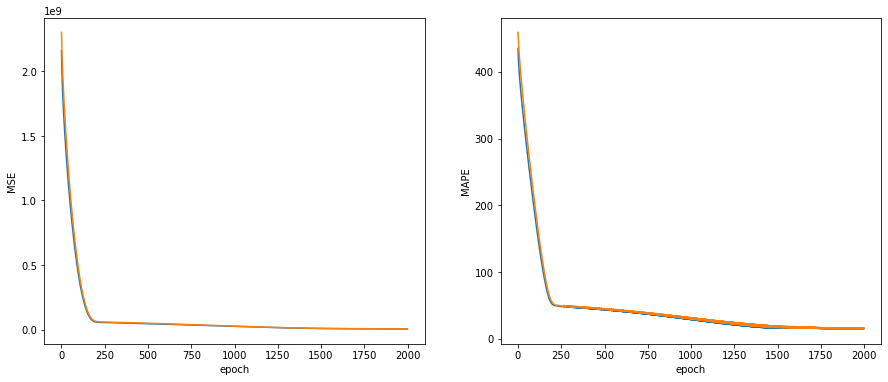

In [16]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('epoch')

plt.subplot(1,2,2)
plt.plot(history.history['mape'])
plt.plot(history.history['val_mape'])
plt.ylabel('MAPE')
plt.xlabel('epoch')
plt.show()

In [17]:
def draw_history(hist,sw=(0,-1)):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.plot(hist.history['loss'][sw[0]:sw[1]])
    plt.plot(hist.history['val_loss'][sw[0]:sw[1]])
    plt.ylabel('MSE')
    plt.xlabel('epoch')

    plt.subplot(1,2,2)
    plt.plot(hist.history['mape'][sw[0]:sw[1]])
    plt.plot(hist.history['val_mape'][sw[0]:sw[1]])
    plt.ylabel('MAPE')
    plt.xlabel('epoch')
    plt.show()

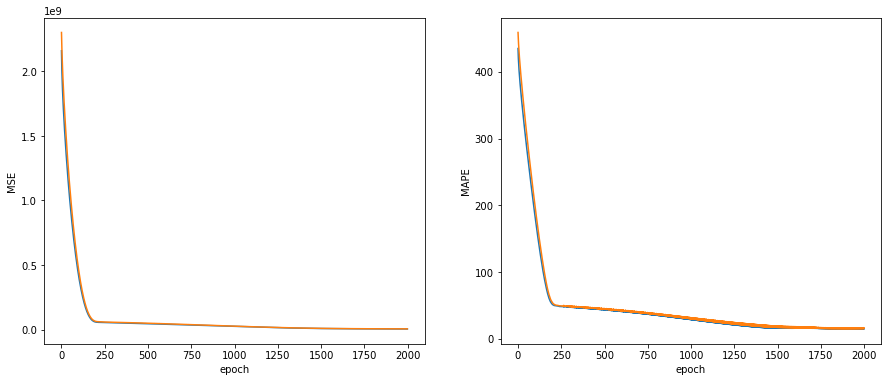

In [18]:
draw_history(history)

## Taking Advantage of Batch_size

In [19]:
keras_model =  keras.Sequential([
    layers.Dense(8,activation='relu'),
    layers.Dense(1)
])
keras_model.compile(optimizer='rmsprop',loss='mse',metrics=['mape'])
history = keras_model.fit(X_train_s, y_train_s,epochs=2000,batch_size = 201,
                validation_data=(X_tune,y_tune))

Epoch 1/2000
4/4 [==============================] - 1s 72ms/step - loss: 607267712.0000 - mape: 245.6108 - val_loss: 603935424.0000 - val_mape: 248.9097
Epoch 2/2000
4/4 [==============================] - 0s 15ms/step - loss: 567091840.0000 - mape: 237.2068 - val_loss: 572979136.0000 - val_mape: 242.2110
Epoch 3/2000
4/4 [==============================] - 0s 15ms/step - loss: 540199424.0000 - mape: 231.3553 - val_loss: 547480192.0000 - val_mape: 236.5393
Epoch 4/2000
4/4 [==============================] - 0s 15ms/step - loss: 517283552.0000 - mape: 226.2244 - val_loss: 524791552.0000 - val_mape: 231.3662
Epoch 5/2000
4/4 [==============================] - 0s 16ms/step - loss: 496512320.0000 - mape: 221.5004 - val_loss: 503734976.0000 - val_mape: 226.4506
Epoch 6/2000
4/4 [==============================] - 0s 16ms/step - loss: 477153408.0000 - mape: 216.9570 - val_loss: 483946816.0000 - val_mape: 221.7232
Epoch 7/2000
4/4 [==============================] - 0s 14ms/step - loss: 458795456

Epoch 55/2000
4/4 [==============================] - 0s 14ms/step - loss: 57235752.0000 - mape: 49.6712 - val_loss: 61471908.0000 - val_mape: 50.4715
Epoch 56/2000
4/4 [==============================] - 0s 13ms/step - loss: 57205532.0000 - mape: 49.7526 - val_loss: 61526944.0000 - val_mape: 50.6913
Epoch 57/2000
4/4 [==============================] - 0s 15ms/step - loss: 57197104.0000 - mape: 49.8449 - val_loss: 61524804.0000 - val_mape: 50.7319
Epoch 58/2000
4/4 [==============================] - 0s 15ms/step - loss: 57151412.0000 - mape: 49.8766 - val_loss: 61534648.0000 - val_mape: 50.8033
Epoch 59/2000
4/4 [==============================] - 0s 17ms/step - loss: 57102708.0000 - mape: 49.7844 - val_loss: 61576084.0000 - val_mape: 50.9599
Epoch 60/2000
4/4 [==============================] - 0s 15ms/step - loss: 57120432.0000 - mape: 49.8939 - val_loss: 61505776.0000 - val_mape: 50.8171
Epoch 61/2000
4/4 [==============================] - 0s 8ms/step - loss: 57224508.0000 - mape: 49.91

4/4 [==============================] - 0s 10ms/step - loss: 56112140.0000 - mape: 49.3358 - val_loss: 60416356.0000 - val_mape: 50.3908
Epoch 110/2000
4/4 [==============================] - 0s 14ms/step - loss: 56005852.0000 - mape: 49.2856 - val_loss: 60363792.0000 - val_mape: 50.3035
Epoch 111/2000
4/4 [==============================] - 0s 13ms/step - loss: 55978016.0000 - mape: 49.2740 - val_loss: 60310792.0000 - val_mape: 50.2167
Epoch 112/2000
4/4 [==============================] - 0s 13ms/step - loss: 56033580.0000 - mape: 49.3255 - val_loss: 60282976.0000 - val_mape: 50.1983
Epoch 113/2000
4/4 [==============================] - 0s 16ms/step - loss: 55949868.0000 - mape: 49.2768 - val_loss: 60221136.0000 - val_mape: 50.0833
Epoch 114/2000
4/4 [==============================] - 0s 14ms/step - loss: 55915376.0000 - mape: 49.1832 - val_loss: 60301236.0000 - val_mape: 50.3707
Epoch 115/2000
4/4 [==============================] - 0s 15ms/step - loss: 55990576.0000 - mape: 49.3348 - va

4/4 [==============================] - 0s 12ms/step - loss: 54658972.0000 - mape: 48.5651 - val_loss: 58955176.0000 - val_mape: 49.8671
Epoch 164/2000
4/4 [==============================] - 0s 13ms/step - loss: 54614684.0000 - mape: 48.5168 - val_loss: 58902304.0000 - val_mape: 49.7984
Epoch 165/2000
4/4 [==============================] - 0s 14ms/step - loss: 54577724.0000 - mape: 48.6710 - val_loss: 58710972.0000 - val_mape: 49.3303
Epoch 166/2000
4/4 [==============================] - 0s 15ms/step - loss: 54562460.0000 - mape: 48.4109 - val_loss: 58816272.0000 - val_mape: 49.7118
Epoch 167/2000
4/4 [==============================] - 0s 14ms/step - loss: 54526804.0000 - mape: 48.6340 - val_loss: 58621100.0000 - val_mape: 49.2122
Epoch 168/2000
4/4 [==============================] - 0s 14ms/step - loss: 54511096.0000 - mape: 48.2811 - val_loss: 58751876.0000 - val_mape: 49.6798
Epoch 169/2000
4/4 [==============================] - 0s 14ms/step - loss: 54440344.0000 - mape: 48.4681 - va

4/4 [==============================] - 0s 11ms/step - loss: 52809940.0000 - mape: 47.5275 - val_loss: 56872344.0000 - val_mape: 48.7299
Epoch 218/2000
4/4 [==============================] - 0s 15ms/step - loss: 52708420.0000 - mape: 47.5073 - val_loss: 56803440.0000 - val_mape: 48.6444
Epoch 219/2000
4/4 [==============================] - 0s 11ms/step - loss: 52719128.0000 - mape: 47.5790 - val_loss: 56698184.0000 - val_mape: 48.4350
Epoch 220/2000
4/4 [==============================] - 0s 17ms/step - loss: 52669696.0000 - mape: 47.3731 - val_loss: 56830764.0000 - val_mape: 48.9032
Epoch 221/2000
4/4 [==============================] - 0s 15ms/step - loss: 52571936.0000 - mape: 47.5119 - val_loss: 56652504.0000 - val_mape: 48.5284
Epoch 222/2000
4/4 [==============================] - 0s 15ms/step - loss: 52565488.0000 - mape: 47.4656 - val_loss: 56549028.0000 - val_mape: 48.3271
Epoch 223/2000
4/4 [==============================] - 0s 14ms/step - loss: 52553668.0000 - mape: 47.3224 - va

4/4 [==============================] - 0s 15ms/step - loss: 50152424.0000 - mape: 46.0606 - val_loss: 54043648.0000 - val_mape: 47.2357
Epoch 272/2000
4/4 [==============================] - 0s 12ms/step - loss: 50124536.0000 - mape: 45.9998 - val_loss: 54073256.0000 - val_mape: 47.4420
Epoch 273/2000
4/4 [==============================] - 0s 13ms/step - loss: 50077740.0000 - mape: 46.0788 - val_loss: 53919300.0000 - val_mape: 47.1524
Epoch 274/2000
4/4 [==============================] - 0s 15ms/step - loss: 50106468.0000 - mape: 46.2499 - val_loss: 53737504.0000 - val_mape: 46.6748
Epoch 275/2000
4/4 [==============================] - 0s 17ms/step - loss: 49978760.0000 - mape: 45.8088 - val_loss: 53857800.0000 - val_mape: 47.2155
Epoch 276/2000
4/4 [==============================] - 0s 19ms/step - loss: 49924300.0000 - mape: 45.9342 - val_loss: 53830000.0000 - val_mape: 47.2532
Epoch 277/2000
4/4 [==============================] - 0s 17ms/step - loss: 49859652.0000 - mape: 45.9597 - va

4/4 [==============================] - 0s 16ms/step - loss: 46929544.0000 - mape: 44.3504 - val_loss: 50487332.0000 - val_mape: 45.0530
Epoch 326/2000
4/4 [==============================] - 0s 15ms/step - loss: 46896032.0000 - mape: 44.2071 - val_loss: 50427916.0000 - val_mape: 45.0755
Epoch 327/2000
4/4 [==============================] - 0s 16ms/step - loss: 46918688.0000 - mape: 44.1624 - val_loss: 50437448.0000 - val_mape: 45.3052
Epoch 328/2000
4/4 [==============================] - 0s 15ms/step - loss: 46738436.0000 - mape: 44.1522 - val_loss: 50301536.0000 - val_mape: 45.0457
Epoch 329/2000
4/4 [==============================] - 0s 15ms/step - loss: 46936356.0000 - mape: 44.2905 - val_loss: 50227296.0000 - val_mape: 44.9500
Epoch 330/2000
4/4 [==============================] - 0s 15ms/step - loss: 46607264.0000 - mape: 43.9419 - val_loss: 50242164.0000 - val_mape: 45.1893
Epoch 331/2000
4/4 [==============================] - 0s 13ms/step - loss: 46563064.0000 - mape: 43.9508 - va

4/4 [==============================] - 0s 16ms/step - loss: 43134324.0000 - mape: 41.8437 - val_loss: 46687528.0000 - val_mape: 43.7948
Epoch 380/2000
4/4 [==============================] - 0s 20ms/step - loss: 43016672.0000 - mape: 42.1290 - val_loss: 46293456.0000 - val_mape: 42.8118
Epoch 381/2000
4/4 [==============================] - 0s 14ms/step - loss: 43004628.0000 - mape: 41.9736 - val_loss: 46163156.0000 - val_mape: 42.4947
Epoch 382/2000
4/4 [==============================] - 0s 16ms/step - loss: 42850324.0000 - mape: 41.6441 - val_loss: 46175920.0000 - val_mape: 42.8793
Epoch 383/2000
4/4 [==============================] - 0s 15ms/step - loss: 42817888.0000 - mape: 41.8206 - val_loss: 46061992.0000 - val_mape: 42.7199
Epoch 384/2000
4/4 [==============================] - 0s 10ms/step - loss: 42699924.0000 - mape: 41.6450 - val_loss: 46001480.0000 - val_mape: 42.7741
Epoch 385/2000
4/4 [==============================] - 0s 15ms/step - loss: 42632544.0000 - mape: 41.5430 - va

4/4 [==============================] - 0s 18ms/step - loss: 38422320.0000 - mape: 38.8284 - val_loss: 41481856.0000 - val_mape: 40.3740
Epoch 434/2000
4/4 [==============================] - 0s 19ms/step - loss: 38349260.0000 - mape: 38.9366 - val_loss: 41382072.0000 - val_mape: 40.2934
Epoch 435/2000
4/4 [==============================] - 0s 18ms/step - loss: 38206908.0000 - mape: 38.7786 - val_loss: 41374800.0000 - val_mape: 40.5249
Epoch 436/2000
4/4 [==============================] - 0s 19ms/step - loss: 38125936.0000 - mape: 38.9196 - val_loss: 41084216.0000 - val_mape: 39.7933
Epoch 437/2000
4/4 [==============================] - 0s 19ms/step - loss: 38072364.0000 - mape: 38.6369 - val_loss: 41102844.0000 - val_mape: 40.2061
Epoch 438/2000
4/4 [==============================] - 0s 17ms/step - loss: 37914236.0000 - mape: 38.6469 - val_loss: 40976488.0000 - val_mape: 40.0906
Epoch 439/2000
4/4 [==============================] - 0s 15ms/step - loss: 37831344.0000 - mape: 38.5093 - va

4/4 [==============================] - 0s 15ms/step - loss: 33065788.0000 - mape: 35.3402 - val_loss: 35837724.0000 - val_mape: 37.0759
Epoch 488/2000
4/4 [==============================] - 0s 14ms/step - loss: 33053864.0000 - mape: 35.4116 - val_loss: 35624576.0000 - val_mape: 36.5589
Epoch 489/2000
4/4 [==============================] - 0s 15ms/step - loss: 32856228.0000 - mape: 35.1448 - val_loss: 35535960.0000 - val_mape: 36.5895
Epoch 490/2000
4/4 [==============================] - 0s 15ms/step - loss: 32810988.0000 - mape: 35.2290 - val_loss: 35398536.0000 - val_mape: 36.3874
Epoch 491/2000
4/4 [==============================] - 0s 15ms/step - loss: 32676828.0000 - mape: 34.9886 - val_loss: 35402580.0000 - val_mape: 36.8006
Epoch 492/2000
4/4 [==============================] - 0s 14ms/step - loss: 32540958.0000 - mape: 35.1492 - val_loss: 35115588.0000 - val_mape: 35.9070
Epoch 493/2000
4/4 [==============================] - 0s 15ms/step - loss: 32473220.0000 - mape: 35.0321 - va

4/4 [==============================] - 0s 15ms/step - loss: 27461224.0000 - mape: 31.0724 - val_loss: 29899684.0000 - val_mape: 33.4968
Epoch 542/2000
4/4 [==============================] - 0s 15ms/step - loss: 27425874.0000 - mape: 31.4171 - val_loss: 29718066.0000 - val_mape: 33.0549
Epoch 543/2000
4/4 [==============================] - 0s 14ms/step - loss: 27227118.0000 - mape: 31.2568 - val_loss: 29533256.0000 - val_mape: 32.5348
Epoch 544/2000
4/4 [==============================] - 0s 13ms/step - loss: 27132636.0000 - mape: 31.1516 - val_loss: 29371364.0000 - val_mape: 32.0924
Epoch 545/2000
4/4 [==============================] - 0s 14ms/step - loss: 27052304.0000 - mape: 31.0936 - val_loss: 29241574.0000 - val_mape: 31.8524
Epoch 546/2000
4/4 [==============================] - 0s 14ms/step - loss: 26896736.0000 - mape: 30.6394 - val_loss: 29359430.0000 - val_mape: 33.1731
Epoch 547/2000
4/4 [==============================] - 0s 13ms/step - loss: 26783186.0000 - mape: 31.0014 - va

4/4 [==============================] - 0s 15ms/step - loss: 21648132.0000 - mape: 27.1716 - val_loss: 23440150.0000 - val_mape: 28.2626
Epoch 596/2000
4/4 [==============================] - 0s 14ms/step - loss: 21414886.0000 - mape: 26.5301 - val_loss: 23406432.0000 - val_mape: 28.7208
Epoch 597/2000
4/4 [==============================] - 0s 16ms/step - loss: 21343154.0000 - mape: 26.5903 - val_loss: 23282476.0000 - val_mape: 28.5440
Epoch 598/2000
4/4 [==============================] - 0s 16ms/step - loss: 21231086.0000 - mape: 26.1725 - val_loss: 23528488.0000 - val_mape: 30.1322
Epoch 599/2000
4/4 [==============================] - 0s 14ms/step - loss: 21159170.0000 - mape: 26.8053 - val_loss: 23017156.0000 - val_mape: 28.0275
Epoch 600/2000
4/4 [==============================] - 0s 16ms/step - loss: 21031496.0000 - mape: 26.2000 - val_loss: 23036462.0000 - val_mape: 28.8249
Epoch 601/2000
4/4 [==============================] - 0s 14ms/step - loss: 20901968.0000 - mape: 26.3726 - va

4/4 [==============================] - 0s 15ms/step - loss: 16209903.0000 - mape: 22.4232 - val_loss: 17731652.0000 - val_mape: 23.5963
Epoch 650/2000
4/4 [==============================] - 0s 12ms/step - loss: 16139730.0000 - mape: 22.2257 - val_loss: 17678656.0000 - val_mape: 24.1962
Epoch 651/2000
4/4 [==============================] - 0s 16ms/step - loss: 16051943.0000 - mape: 22.1414 - val_loss: 17636544.0000 - val_mape: 24.6472
Epoch 652/2000
4/4 [==============================] - 0s 15ms/step - loss: 15935445.0000 - mape: 22.2410 - val_loss: 17420248.0000 - val_mape: 23.3897
Epoch 653/2000
4/4 [==============================] - 0s 15ms/step - loss: 15944910.0000 - mape: 22.1078 - val_loss: 17411112.0000 - val_mape: 24.3014
Epoch 654/2000
4/4 [==============================] - 0s 14ms/step - loss: 15760519.0000 - mape: 22.1949 - val_loss: 17228192.0000 - val_mape: 23.0836
Epoch 655/2000
4/4 [==============================] - 0s 16ms/step - loss: 15679483.0000 - mape: 21.8400 - va

4/4 [==============================] - 0s 13ms/step - loss: 11816389.0000 - mape: 18.6703 - val_loss: 12985559.0000 - val_mape: 20.3809
Epoch 704/2000
4/4 [==============================] - 0s 14ms/step - loss: 11815891.0000 - mape: 18.6536 - val_loss: 12962447.0000 - val_mape: 20.9685
Epoch 705/2000
4/4 [==============================] - 0s 15ms/step - loss: 11714898.0000 - mape: 18.6749 - val_loss: 12839034.0000 - val_mape: 19.9695
Epoch 706/2000
4/4 [==============================] - 0s 16ms/step - loss: 11605551.0000 - mape: 18.2505 - val_loss: 12844201.0000 - val_mape: 21.0050
Epoch 707/2000
4/4 [==============================] - 0s 16ms/step - loss: 11518996.0000 - mape: 18.6670 - val_loss: 12739601.0000 - val_mape: 18.8514
Epoch 708/2000
4/4 [==============================] - 0s 14ms/step - loss: 11471360.0000 - mape: 18.3041 - val_loss: 12637807.0000 - val_mape: 19.0892
Epoch 709/2000
4/4 [==============================] - 0s 15ms/step - loss: 11433654.0000 - mape: 18.0585 - va

4/4 [==============================] - 0s 17ms/step - loss: 8982187.0000 - mape: 16.9706 - val_loss: 9914072.0000 - val_mape: 17.2715
Epoch 758/2000
4/4 [==============================] - 0s 18ms/step - loss: 8891029.0000 - mape: 16.7193 - val_loss: 9835047.0000 - val_mape: 17.8194
Epoch 759/2000
4/4 [==============================] - 0s 16ms/step - loss: 8933044.0000 - mape: 17.3818 - val_loss: 9925680.0000 - val_mape: 17.1588
Epoch 760/2000
4/4 [==============================] - 0s 17ms/step - loss: 8907054.0000 - mape: 17.0455 - val_loss: 9795862.0000 - val_mape: 17.2627
Epoch 761/2000
4/4 [==============================] - 0s 14ms/step - loss: 8798138.0000 - mape: 16.6690 - val_loss: 9762635.0000 - val_mape: 18.3769
Epoch 762/2000
4/4 [==============================] - 0s 10ms/step - loss: 8757434.0000 - mape: 16.7858 - val_loss: 9748323.0000 - val_mape: 18.5912
Epoch 763/2000
4/4 [==============================] - 0s 15ms/step - loss: 8733284.0000 - mape: 17.0235 - val_loss: 96766

4/4 [==============================] - 0s 14ms/step - loss: 7654151.5000 - mape: 17.5330 - val_loss: 8391586.0000 - val_mape: 17.8588
Epoch 813/2000
4/4 [==============================] - 0s 15ms/step - loss: 7563012.5000 - mape: 17.3263 - val_loss: 8454641.0000 - val_mape: 17.7479
Epoch 814/2000
4/4 [==============================] - 0s 15ms/step - loss: 7547036.0000 - mape: 17.1527 - val_loss: 8341979.5000 - val_mape: 17.9566
Epoch 815/2000
4/4 [==============================] - 0s 14ms/step - loss: 7514820.0000 - mape: 17.1358 - val_loss: 8347726.5000 - val_mape: 18.6458
Epoch 816/2000
4/4 [==============================] - 0s 15ms/step - loss: 7558891.5000 - mape: 17.4595 - val_loss: 8299669.0000 - val_mape: 18.4436
Epoch 817/2000
4/4 [==============================] - 0s 15ms/step - loss: 7520695.5000 - mape: 17.3652 - val_loss: 8287791.0000 - val_mape: 18.4853
Epoch 818/2000
4/4 [==============================] - 0s 15ms/step - loss: 7510830.5000 - mape: 17.1836 - val_loss: 83201

4/4 [==============================] - 0s 15ms/step - loss: 7126420.5000 - mape: 17.9428 - val_loss: 7855015.5000 - val_mape: 19.1897
Epoch 868/2000
4/4 [==============================] - 0s 15ms/step - loss: 7138378.0000 - mape: 17.9659 - val_loss: 7861509.0000 - val_mape: 19.2925
Epoch 869/2000
4/4 [==============================] - 0s 16ms/step - loss: 7108980.5000 - mape: 18.0241 - val_loss: 7971486.5000 - val_mape: 18.4797
Epoch 870/2000
4/4 [==============================] - 0s 19ms/step - loss: 7153907.5000 - mape: 17.9481 - val_loss: 7831010.0000 - val_mape: 18.8430
Epoch 871/2000
4/4 [==============================] - 0s 14ms/step - loss: 7291356.5000 - mape: 18.1170 - val_loss: 7834405.5000 - val_mape: 19.2361
Epoch 872/2000
4/4 [==============================] - 0s 15ms/step - loss: 7111864.5000 - mape: 18.0214 - val_loss: 7816152.5000 - val_mape: 19.0560
Epoch 873/2000
4/4 [==============================] - 0s 15ms/step - loss: 7097289.0000 - mape: 17.9005 - val_loss: 78103

4/4 [==============================] - 0s 14ms/step - loss: 6945746.0000 - mape: 18.2438 - val_loss: 7646732.0000 - val_mape: 19.5330
Epoch 923/2000
4/4 [==============================] - 0s 15ms/step - loss: 7013718.5000 - mape: 18.3684 - val_loss: 7665603.0000 - val_mape: 19.7068
Epoch 924/2000
4/4 [==============================] - 0s 15ms/step - loss: 6985440.0000 - mape: 18.4278 - val_loss: 7631511.5000 - val_mape: 19.2287
Epoch 925/2000
4/4 [==============================] - 0s 16ms/step - loss: 7032006.5000 - mape: 18.5362 - val_loss: 7672384.5000 - val_mape: 18.9847
Epoch 926/2000
4/4 [==============================] - 0s 16ms/step - loss: 6963063.5000 - mape: 18.3805 - val_loss: 7723491.5000 - val_mape: 18.8580
Epoch 927/2000
4/4 [==============================] - 0s 9ms/step - loss: 6978238.0000 - mape: 18.3741 - val_loss: 7683478.5000 - val_mape: 18.9407
Epoch 928/2000
4/4 [==============================] - 0s 11ms/step - loss: 6957662.0000 - mape: 18.3105 - val_loss: 762877

4/4 [==============================] - 0s 13ms/step - loss: 6817063.5000 - mape: 18.3329 - val_loss: 7516649.0000 - val_mape: 19.1818
Epoch 978/2000
4/4 [==============================] - 0s 16ms/step - loss: 6822426.5000 - mape: 18.2868 - val_loss: 7516085.5000 - val_mape: 19.6073
Epoch 979/2000
4/4 [==============================] - 0s 14ms/step - loss: 6880924.5000 - mape: 18.5600 - val_loss: 7596569.5000 - val_mape: 18.9038
Epoch 980/2000
4/4 [==============================] - 0s 13ms/step - loss: 6892780.5000 - mape: 18.4128 - val_loss: 7521496.5000 - val_mape: 19.6884
Epoch 981/2000
4/4 [==============================] - 0s 14ms/step - loss: 6848852.0000 - mape: 18.4083 - val_loss: 7515797.5000 - val_mape: 19.6574
Epoch 982/2000
4/4 [==============================] - 0s 15ms/step - loss: 6807203.5000 - mape: 18.3208 - val_loss: 7495149.5000 - val_mape: 19.4362
Epoch 983/2000
4/4 [==============================] - 0s 15ms/step - loss: 6841458.5000 - mape: 18.2801 - val_loss: 76447

Epoch 1032/2000
4/4 [==============================] - 0s 15ms/step - loss: 6700075.5000 - mape: 18.2555 - val_loss: 7438219.0000 - val_mape: 18.9700
Epoch 1033/2000
4/4 [==============================] - 0s 14ms/step - loss: 6732431.5000 - mape: 18.3645 - val_loss: 7644965.5000 - val_mape: 18.7816
Epoch 1034/2000
4/4 [==============================] - 0s 15ms/step - loss: 6777728.5000 - mape: 18.3353 - val_loss: 7389723.5000 - val_mape: 19.3022
Epoch 1035/2000
4/4 [==============================] - 0s 14ms/step - loss: 6761123.0000 - mape: 18.3379 - val_loss: 7442060.0000 - val_mape: 19.8279
Epoch 1036/2000
4/4 [==============================] - 0s 16ms/step - loss: 6729419.0000 - mape: 18.3944 - val_loss: 7411377.0000 - val_mape: 19.0415
Epoch 1037/2000
4/4 [==============================] - 0s 16ms/step - loss: 6725517.5000 - mape: 18.3698 - val_loss: 7404504.5000 - val_mape: 19.0637
Epoch 1038/2000
4/4 [==============================] - 0s 16ms/step - loss: 6740498.5000 - mape: 18.

4/4 [==============================] - 0s 15ms/step - loss: 6606224.0000 - mape: 18.1971 - val_loss: 7298471.0000 - val_mape: 19.0679
Epoch 1087/2000
4/4 [==============================] - 0s 15ms/step - loss: 6727815.5000 - mape: 18.5585 - val_loss: 7289428.0000 - val_mape: 19.2769
Epoch 1088/2000
4/4 [==============================] - 0s 14ms/step - loss: 6601325.5000 - mape: 18.2116 - val_loss: 7287042.5000 - val_mape: 19.2566
Epoch 1089/2000
4/4 [==============================] - 0s 14ms/step - loss: 6636595.5000 - mape: 18.2353 - val_loss: 7297524.0000 - val_mape: 19.0238
Epoch 1090/2000
4/4 [==============================] - 0s 15ms/step - loss: 6583226.0000 - mape: 18.1840 - val_loss: 7524613.0000 - val_mape: 18.7025
Epoch 1091/2000
4/4 [==============================] - 0s 17ms/step - loss: 6644291.0000 - mape: 18.1497 - val_loss: 7288590.0000 - val_mape: 19.0632
Epoch 1092/2000
4/4 [==============================] - 0s 15ms/step - loss: 6647055.5000 - mape: 18.1797 - val_loss:

Epoch 1141/2000
4/4 [==============================] - 0s 15ms/step - loss: 6563707.5000 - mape: 18.2583 - val_loss: 7193693.5000 - val_mape: 19.0283
Epoch 1142/2000
4/4 [==============================] - 0s 16ms/step - loss: 6531093.0000 - mape: 18.2388 - val_loss: 7281025.5000 - val_mape: 18.6829
Epoch 1143/2000
4/4 [==============================] - 0s 14ms/step - loss: 6501778.5000 - mape: 17.9872 - val_loss: 7236833.0000 - val_mape: 19.5978
Epoch 1144/2000
4/4 [==============================] - 0s 15ms/step - loss: 6542059.5000 - mape: 18.1695 - val_loss: 7193842.5000 - val_mape: 19.2900
Epoch 1145/2000
4/4 [==============================] - 0s 15ms/step - loss: 6480754.5000 - mape: 18.0197 - val_loss: 7196427.0000 - val_mape: 19.3389
Epoch 1146/2000
4/4 [==============================] - 0s 15ms/step - loss: 6535657.5000 - mape: 18.1630 - val_loss: 7181279.5000 - val_mape: 19.1086
Epoch 1147/2000
4/4 [==============================] - 0s 16ms/step - loss: 6504184.5000 - mape: 18.

4/4 [==============================] - 0s 14ms/step - loss: 6507115.5000 - mape: 18.2169 - val_loss: 7094763.5000 - val_mape: 19.0484
Epoch 1196/2000
4/4 [==============================] - 0s 10ms/step - loss: 6387270.0000 - mape: 17.9218 - val_loss: 7093536.5000 - val_mape: 18.9719
Epoch 1197/2000
4/4 [==============================] - 0s 16ms/step - loss: 6412897.0000 - mape: 18.0798 - val_loss: 7330057.0000 - val_mape: 18.5484
Epoch 1198/2000
4/4 [==============================] - 0s 14ms/step - loss: 6413797.5000 - mape: 17.8663 - val_loss: 7113574.0000 - val_mape: 19.3320
Epoch 1199/2000
4/4 [==============================] - 0s 15ms/step - loss: 6420514.0000 - mape: 17.9893 - val_loss: 7106272.0000 - val_mape: 19.2859
Epoch 1200/2000
4/4 [==============================] - 0s 15ms/step - loss: 6448374.5000 - mape: 18.0993 - val_loss: 7112301.5000 - val_mape: 18.7479
Epoch 1201/2000
4/4 [==============================] - 0s 15ms/step - loss: 6464637.0000 - mape: 18.0999 - val_loss:

Epoch 1250/2000
4/4 [==============================] - 0s 16ms/step - loss: 6466842.5000 - mape: 18.1653 - val_loss: 7080332.0000 - val_mape: 18.5293
Epoch 1251/2000
4/4 [==============================] - 0s 15ms/step - loss: 6322236.0000 - mape: 17.8088 - val_loss: 7043979.5000 - val_mape: 18.5947
Epoch 1252/2000
4/4 [==============================] - 0s 17ms/step - loss: 6312162.5000 - mape: 17.8369 - val_loss: 7056206.5000 - val_mape: 18.5624
Epoch 1253/2000
4/4 [==============================] - 0s 15ms/step - loss: 6307889.0000 - mape: 17.9040 - val_loss: 7073070.0000 - val_mape: 18.5291
Epoch 1254/2000
4/4 [==============================] - 0s 16ms/step - loss: 6351240.5000 - mape: 17.8371 - val_loss: 7023192.5000 - val_mape: 18.6416
Epoch 1255/2000
4/4 [==============================] - 0s 15ms/step - loss: 6334994.5000 - mape: 17.9229 - val_loss: 7014255.5000 - val_mape: 19.1877
Epoch 1256/2000
4/4 [==============================] - 0s 14ms/step - loss: 6325760.0000 - mape: 17.

4/4 [==============================] - 0s 15ms/step - loss: 6203312.0000 - mape: 17.6750 - val_loss: 6933932.0000 - val_mape: 18.5832
Epoch 1305/2000
4/4 [==============================] - 0s 15ms/step - loss: 6364641.5000 - mape: 17.9816 - val_loss: 6914912.0000 - val_mape: 18.8945
Epoch 1306/2000
4/4 [==============================] - 0s 15ms/step - loss: 6236215.0000 - mape: 17.9245 - val_loss: 7078228.0000 - val_mape: 18.3689
Epoch 1307/2000
4/4 [==============================] - 0s 14ms/step - loss: 6217164.5000 - mape: 17.8043 - val_loss: 6989722.5000 - val_mape: 18.4296
Epoch 1308/2000
4/4 [==============================] - 0s 15ms/step - loss: 6211699.5000 - mape: 17.7545 - val_loss: 6984247.5000 - val_mape: 18.4340
Epoch 1309/2000
4/4 [==============================] - 0s 15ms/step - loss: 6194199.0000 - mape: 17.6778 - val_loss: 6912906.0000 - val_mape: 18.6646
Epoch 1310/2000
4/4 [==============================] - 0s 15ms/step - loss: 6250431.0000 - mape: 17.9225 - val_loss:

Epoch 1359/2000
4/4 [==============================] - 0s 16ms/step - loss: 6214211.0000 - mape: 17.9188 - val_loss: 6908016.5000 - val_mape: 18.3515
Epoch 1360/2000
4/4 [==============================] - 0s 15ms/step - loss: 6268058.0000 - mape: 18.1565 - val_loss: 6882982.0000 - val_mape: 18.3869
Epoch 1361/2000
4/4 [==============================] - 0s 16ms/step - loss: 6148724.0000 - mape: 17.5865 - val_loss: 6836063.5000 - val_mape: 18.8825
Epoch 1362/2000
4/4 [==============================] - 0s 16ms/step - loss: 6122102.5000 - mape: 17.6176 - val_loss: 6845672.0000 - val_mape: 18.9841
Epoch 1363/2000
4/4 [==============================] - 0s 13ms/step - loss: 6114374.0000 - mape: 17.5848 - val_loss: 6887152.5000 - val_mape: 19.2542
Epoch 1364/2000
4/4 [==============================] - 0s 15ms/step - loss: 6109248.5000 - mape: 17.7127 - val_loss: 6822732.5000 - val_mape: 18.7551
Epoch 1365/2000
4/4 [==============================] - 0s 14ms/step - loss: 6243650.0000 - mape: 18.

4/4 [==============================] - 0s 15ms/step - loss: 6098401.0000 - mape: 17.7718 - val_loss: 6749288.0000 - val_mape: 18.5494
Epoch 1414/2000
4/4 [==============================] - 0s 15ms/step - loss: 6177024.0000 - mape: 17.7652 - val_loss: 6751148.0000 - val_mape: 18.7360
Epoch 1415/2000
4/4 [==============================] - 0s 18ms/step - loss: 6048912.5000 - mape: 17.6914 - val_loss: 6808777.0000 - val_mape: 18.2902
Epoch 1416/2000
4/4 [==============================] - 0s 17ms/step - loss: 6013395.5000 - mape: 17.3483 - val_loss: 6787872.5000 - val_mape: 19.0504
Epoch 1417/2000
4/4 [==============================] - 0s 13ms/step - loss: 6070210.0000 - mape: 17.7037 - val_loss: 6745776.5000 - val_mape: 18.5081
Epoch 1418/2000
4/4 [==============================] - 0s 15ms/step - loss: 6050510.5000 - mape: 17.6046 - val_loss: 6747968.5000 - val_mape: 18.4662
Epoch 1419/2000
4/4 [==============================] - 0s 15ms/step - loss: 6107012.5000 - mape: 17.7557 - val_loss:

Epoch 1468/2000
4/4 [==============================] - 0s 15ms/step - loss: 6039042.5000 - mape: 17.7523 - val_loss: 6686503.5000 - val_mape: 18.7899
Epoch 1469/2000
4/4 [==============================] - 0s 11ms/step - loss: 6025514.0000 - mape: 17.6645 - val_loss: 6666167.0000 - val_mape: 18.5333
Epoch 1470/2000
4/4 [==============================] - 0s 15ms/step - loss: 5943238.0000 - mape: 17.5200 - val_loss: 6698077.0000 - val_mape: 18.2683
Epoch 1471/2000
4/4 [==============================] - 0s 18ms/step - loss: 5947229.0000 - mape: 17.3632 - val_loss: 6664317.5000 - val_mape: 18.5694
Epoch 1472/2000
4/4 [==============================] - 0s 14ms/step - loss: 5959961.5000 - mape: 17.6009 - val_loss: 6688501.0000 - val_mape: 18.2836
Epoch 1473/2000
4/4 [==============================] - 0s 15ms/step - loss: 6015565.0000 - mape: 17.6822 - val_loss: 6682357.0000 - val_mape: 18.2961
Epoch 1474/2000
4/4 [==============================] - 0s 12ms/step - loss: 5997391.0000 - mape: 17.

4/4 [==============================] - 0s 15ms/step - loss: 6015092.0000 - mape: 17.7826 - val_loss: 6703022.0000 - val_mape: 18.0778
Epoch 1523/2000
4/4 [==============================] - 0s 15ms/step - loss: 5895580.5000 - mape: 17.3443 - val_loss: 6623373.5000 - val_mape: 18.1731
Epoch 1524/2000
4/4 [==============================] - 0s 16ms/step - loss: 5880660.5000 - mape: 17.4308 - val_loss: 6648226.5000 - val_mape: 18.1252
Epoch 1525/2000
4/4 [==============================] - 0s 15ms/step - loss: 5876066.0000 - mape: 17.2436 - val_loss: 6674080.5000 - val_mape: 19.0955
Epoch 1526/2000
4/4 [==============================] - 0s 14ms/step - loss: 5939258.5000 - mape: 17.5721 - val_loss: 6594843.5000 - val_mape: 18.6165
Epoch 1527/2000
4/4 [==============================] - 0s 11ms/step - loss: 5894362.0000 - mape: 17.4035 - val_loss: 6592395.0000 - val_mape: 18.2532
Epoch 1528/2000
4/4 [==============================] - 0s 15ms/step - loss: 5884127.0000 - mape: 17.4146 - val_loss:

Epoch 1577/2000
4/4 [==============================] - 0s 13ms/step - loss: 5854392.5000 - mape: 17.4084 - val_loss: 6591968.0000 - val_mape: 18.0181
Epoch 1578/2000
4/4 [==============================] - 0s 13ms/step - loss: 5864270.5000 - mape: 17.4141 - val_loss: 6515539.0000 - val_mape: 18.1852
Epoch 1579/2000
4/4 [==============================] - 0s 13ms/step - loss: 5811806.0000 - mape: 17.3325 - val_loss: 6701060.0000 - val_mape: 17.9760
Epoch 1580/2000
4/4 [==============================] - 0s 11ms/step - loss: 5851381.0000 - mape: 17.3504 - val_loss: 6504332.5000 - val_mape: 18.2954
Epoch 1581/2000
4/4 [==============================] - 0s 11ms/step - loss: 5807102.5000 - mape: 17.2612 - val_loss: 6547751.0000 - val_mape: 18.7597
Epoch 1582/2000
4/4 [==============================] - 0s 15ms/step - loss: 5837214.5000 - mape: 17.4184 - val_loss: 6515700.0000 - val_mape: 18.1469
Epoch 1583/2000
4/4 [==============================] - 0s 16ms/step - loss: 5824098.0000 - mape: 17.

4/4 [==============================] - 0s 16ms/step - loss: 5762478.0000 - mape: 17.1254 - val_loss: 6529866.5000 - val_mape: 18.9407
Epoch 1632/2000
4/4 [==============================] - 0s 15ms/step - loss: 5834672.5000 - mape: 17.4043 - val_loss: 6460215.0000 - val_mape: 18.0133
Epoch 1633/2000
4/4 [==============================] - 0s 14ms/step - loss: 5744689.0000 - mape: 17.1684 - val_loss: 6432074.0000 - val_mape: 18.3032
Epoch 1634/2000
4/4 [==============================] - 0s 16ms/step - loss: 5852698.0000 - mape: 17.4084 - val_loss: 6431098.5000 - val_mape: 18.3103
Epoch 1635/2000
4/4 [==============================] - 0s 15ms/step - loss: 5718500.5000 - mape: 17.1770 - val_loss: 6430143.0000 - val_mape: 18.3159
Epoch 1636/2000
4/4 [==============================] - 0s 15ms/step - loss: 5728288.0000 - mape: 17.1452 - val_loss: 6484230.5000 - val_mape: 18.7404
Epoch 1637/2000
4/4 [==============================] - 0s 18ms/step - loss: 5793413.0000 - mape: 17.4149 - val_loss:

Epoch 1686/2000
4/4 [==============================] - 0s 16ms/step - loss: 5672573.5000 - mape: 17.0045 - val_loss: 6369362.0000 - val_mape: 18.3252
Epoch 1687/2000
4/4 [==============================] - 0s 16ms/step - loss: 5700861.5000 - mape: 17.3294 - val_loss: 6356752.5000 - val_mape: 18.0886
Epoch 1688/2000
4/4 [==============================] - 0s 15ms/step - loss: 5769192.5000 - mape: 17.4940 - val_loss: 6447814.0000 - val_mape: 17.8331
Epoch 1689/2000
4/4 [==============================] - 0s 16ms/step - loss: 5662479.5000 - mape: 17.1298 - val_loss: 6440084.5000 - val_mape: 17.8372
Epoch 1690/2000
4/4 [==============================] - 0s 16ms/step - loss: 5656267.0000 - mape: 17.1341 - val_loss: 6420883.5000 - val_mape: 17.8543
Epoch 1691/2000
4/4 [==============================] - 0s 15ms/step - loss: 5670718.0000 - mape: 17.1938 - val_loss: 6409763.5000 - val_mape: 17.8670
Epoch 1692/2000
4/4 [==============================] - 0s 14ms/step - loss: 5636710.5000 - mape: 17.

4/4 [==============================] - 0s 15ms/step - loss: 5609562.5000 - mape: 17.1675 - val_loss: 6516189.0000 - val_mape: 17.7595
Epoch 1741/2000
4/4 [==============================] - 0s 16ms/step - loss: 5616463.0000 - mape: 17.0441 - val_loss: 6347682.0000 - val_mape: 17.7893
Epoch 1742/2000
4/4 [==============================] - 0s 16ms/step - loss: 5667640.0000 - mape: 17.2680 - val_loss: 6375202.0000 - val_mape: 17.7531
Epoch 1743/2000
4/4 [==============================] - 0s 16ms/step - loss: 5612738.0000 - mape: 17.0062 - val_loss: 6295296.0000 - val_mape: 18.1958
Epoch 1744/2000
4/4 [==============================] - 0s 15ms/step - loss: 5620101.0000 - mape: 17.2158 - val_loss: 6425554.0000 - val_mape: 17.7261
Epoch 1745/2000
4/4 [==============================] - 0s 13ms/step - loss: 5621726.0000 - mape: 17.0858 - val_loss: 6284105.0000 - val_mape: 18.0348
Epoch 1746/2000
4/4 [==============================] - 0s 16ms/step - loss: 5569014.0000 - mape: 17.0542 - val_loss:

Epoch 1795/2000
4/4 [==============================] - 0s 16ms/step - loss: 5531582.0000 - mape: 17.0485 - val_loss: 6251390.5000 - val_mape: 17.7698
Epoch 1796/2000
4/4 [==============================] - 0s 13ms/step - loss: 5627185.5000 - mape: 17.3627 - val_loss: 6271072.0000 - val_mape: 17.7275
Epoch 1797/2000
4/4 [==============================] - 0s 16ms/step - loss: 5570820.5000 - mape: 17.0628 - val_loss: 6252966.0000 - val_mape: 17.7589
Epoch 1798/2000
4/4 [==============================] - 0s 16ms/step - loss: 5516647.0000 - mape: 16.8311 - val_loss: 6227727.5000 - val_mape: 18.0934
Epoch 1799/2000
4/4 [==============================] - 0s 17ms/step - loss: 5564204.0000 - mape: 17.0763 - val_loss: 6219575.0000 - val_mape: 17.9526
Epoch 1800/2000
4/4 [==============================] - 0s 15ms/step - loss: 5580597.5000 - mape: 16.9875 - val_loss: 6299082.0000 - val_mape: 18.5732
Epoch 1801/2000
4/4 [==============================] - 0s 15ms/step - loss: 5562015.0000 - mape: 17.

4/4 [==============================] - 0s 15ms/step - loss: 5458858.0000 - mape: 16.8912 - val_loss: 6323231.0000 - val_mape: 17.5794
Epoch 1850/2000
4/4 [==============================] - 0s 15ms/step - loss: 5448178.5000 - mape: 16.7868 - val_loss: 6170812.5000 - val_mape: 18.0535
Epoch 1851/2000
4/4 [==============================] - 0s 15ms/step - loss: 5644963.5000 - mape: 17.3939 - val_loss: 6165192.5000 - val_mape: 17.9986
Epoch 1852/2000
4/4 [==============================] - 0s 15ms/step - loss: 5460171.0000 - mape: 16.7978 - val_loss: 6176989.5000 - val_mape: 18.1221
Epoch 1853/2000
4/4 [==============================] - 0s 14ms/step - loss: 5463761.5000 - mape: 16.8956 - val_loss: 6161501.5000 - val_mape: 17.7609
Epoch 1854/2000
4/4 [==============================] - 0s 15ms/step - loss: 5550424.0000 - mape: 17.1853 - val_loss: 6219386.5000 - val_mape: 17.6129
Epoch 1855/2000
4/4 [==============================] - 0s 14ms/step - loss: 5586301.0000 - mape: 17.3516 - val_loss:

Epoch 1904/2000
4/4 [==============================] - 0s 10ms/step - loss: 5422308.0000 - mape: 16.7889 - val_loss: 6097788.0000 - val_mape: 17.7454
Epoch 1905/2000
4/4 [==============================] - 0s 15ms/step - loss: 5408806.0000 - mape: 16.7995 - val_loss: 6096237.0000 - val_mape: 17.7628
Epoch 1906/2000
4/4 [==============================] - 0s 17ms/step - loss: 5514385.0000 - mape: 17.0646 - val_loss: 6104218.0000 - val_mape: 17.9444
Epoch 1907/2000
4/4 [==============================] - 0s 12ms/step - loss: 5473225.0000 - mape: 16.8839 - val_loss: 6131856.5000 - val_mape: 18.1669
Epoch 1908/2000
4/4 [==============================] - 0s 15ms/step - loss: 5420769.5000 - mape: 16.8326 - val_loss: 6186136.0000 - val_mape: 18.4429
Epoch 1909/2000
4/4 [==============================] - 0s 15ms/step - loss: 5556079.5000 - mape: 17.3041 - val_loss: 6097689.5000 - val_mape: 17.6698
Epoch 1910/2000
4/4 [==============================] - 0s 16ms/step - loss: 5402877.0000 - mape: 16.

4/4 [==============================] - 0s 15ms/step - loss: 5353132.0000 - mape: 16.5970 - val_loss: 6299355.5000 - val_mape: 19.0130
Epoch 1959/2000
4/4 [==============================] - 0s 15ms/step - loss: 5433381.0000 - mape: 17.1796 - val_loss: 6235469.5000 - val_mape: 17.4381
Epoch 1960/2000
4/4 [==============================] - 0s 15ms/step - loss: 5396923.0000 - mape: 16.8177 - val_loss: 6034003.0000 - val_mape: 17.6895
Epoch 1961/2000
4/4 [==============================] - 0s 15ms/step - loss: 5383392.0000 - mape: 16.7604 - val_loss: 6033203.0000 - val_mape: 17.6514
Epoch 1962/2000
4/4 [==============================] - 0s 12ms/step - loss: 5363574.0000 - mape: 16.7002 - val_loss: 6032215.0000 - val_mape: 17.6446
Epoch 1963/2000
4/4 [==============================] - 0s 15ms/step - loss: 5342643.5000 - mape: 16.6402 - val_loss: 6143620.0000 - val_mape: 18.4347
Epoch 1964/2000
4/4 [==============================] - 0s 15ms/step - loss: 5415816.5000 - mape: 16.8911 - val_loss:

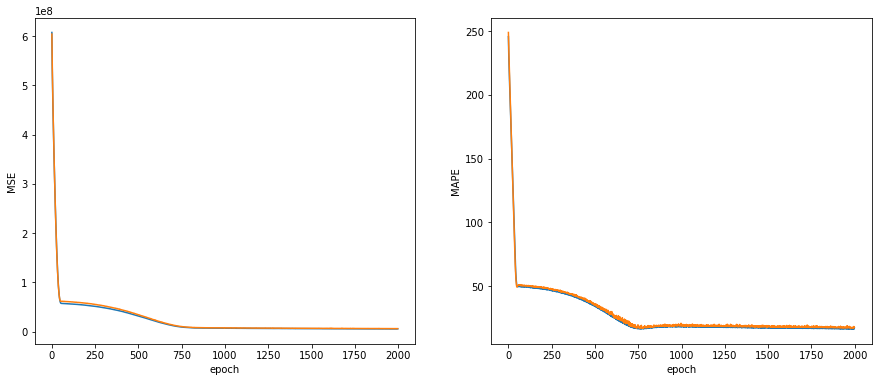

In [20]:
draw_history(history)

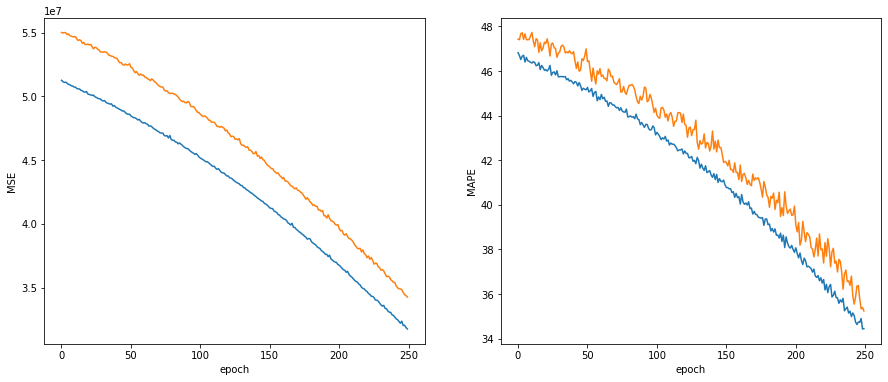

In [21]:
draw_history(history,sw=(250,500))

## Affording bigger and denser networks
## saving the best model

In [22]:
from keras.callbacks import ModelCheckpoint
keras_model =  keras.Sequential([
    layers.Dense(16,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(8,activation='relu'),
    layers.Dense(1)
])
keras_model.compile(optimizer='rmsprop',loss='mse',metrics=['mse','mape'])
model_save = ModelCheckpoint('best_model_mape', save_best_only=True, monitor='val_mape', mode='min')

history = keras_model.fit(X_train_s, y_train_s,epochs=500,batch_size =  201,
                validation_data=(X_tune,y_tune), callbacks = [model_save])

Epoch 1/500
4/4 [==============================] - 2s 419ms/step - loss: 605737664.0000 - mse: 605737664.0000 - mape: 220.6298 - val_loss: 437652704.0000 - val_mse: 437652704.0000 - val_mape: 191.5695
Epoch 2/500
4/4 [==============================] - 1s 329ms/step - loss: 324130688.0000 - mse: 324130688.0000 - mape: 158.4963 - val_loss: 279706656.0000 - val_mse: 279706656.0000 - val_mape: 150.4576
Epoch 3/500
4/4 [==============================] - 1s 266ms/step - loss: 211951984.0000 - mse: 211951984.0000 - mape: 125.0443 - val_loss: 192627136.0000 - val_mse: 192627136.0000 - val_mape: 122.3239
Epoch 4/500
4/4 [==============================] - 1s 302ms/step - loss: 148442224.0000 - mse: 148442224.0000 - mape: 101.2802 - val_loss: 140147856.0000 - val_mse: 140147856.0000 - val_mape: 101.1135
Epoch 5/500
4/4 [==============================] - 1s 249ms/step - loss: 109819528.0000 - mse: 109819528.0000 - mape: 84.4840 - val_loss: 107060872.0000 - val_mse: 107060872.0000 - val_mape: 84.46

4/4 [==============================] - 0s 18ms/step - loss: 55257812.0000 - mse: 55257812.0000 - mape: 48.9387 - val_loss: 59386492.0000 - val_mse: 59386492.0000 - val_mape: 49.3898
Epoch 30/500
4/4 [==============================] - 0s 17ms/step - loss: 54997108.0000 - mse: 54997108.0000 - mape: 48.6028 - val_loss: 60996044.0000 - val_mse: 60996044.0000 - val_mape: 52.6663
Epoch 31/500
4/4 [==============================] - 0s 23ms/step - loss: 55851032.0000 - mse: 55851032.0000 - mape: 49.7949 - val_loss: 59239660.0000 - val_mse: 59239660.0000 - val_mape: 49.6657
Epoch 32/500
4/4 [==============================] - 0s 17ms/step - loss: 54672464.0000 - mse: 54672464.0000 - mape: 48.6884 - val_loss: 58955800.0000 - val_mse: 58955800.0000 - val_mape: 49.1026
Epoch 33/500
4/4 [==============================] - 0s 16ms/step - loss: 54890720.0000 - mse: 54890720.0000 - mape: 49.0465 - val_loss: 59449524.0000 - val_mse: 59449524.0000 - val_mape: 50.6674
Epoch 34/500
4/4 [====================

4/4 [==============================] - 1s 343ms/step - loss: 48171216.0000 - mse: 48171216.0000 - mape: 45.6108 - val_loss: 53422732.0000 - val_mse: 53422732.0000 - val_mape: 45.0099
Epoch 65/500
4/4 [==============================] - 0s 15ms/step - loss: 48376704.0000 - mse: 48376704.0000 - mape: 45.3416 - val_loss: 53717700.0000 - val_mse: 53717700.0000 - val_mape: 48.8953
Epoch 66/500
4/4 [==============================] - 1s 335ms/step - loss: 47570680.0000 - mse: 47570680.0000 - mape: 45.4878 - val_loss: 52377812.0000 - val_mse: 52377812.0000 - val_mape: 44.6854
Epoch 67/500
4/4 [==============================] - 0s 14ms/step - loss: 47134612.0000 - mse: 47134612.0000 - mape: 44.8158 - val_loss: 51276000.0000 - val_mse: 51276000.0000 - val_mape: 44.7795
Epoch 68/500
4/4 [==============================] - 0s 22ms/step - loss: 48939176.0000 - mse: 48939176.0000 - mape: 46.0400 - val_loss: 54279392.0000 - val_mse: 54279392.0000 - val_mape: 50.8550
Epoch 69/500
4/4 [==================

Epoch 96/500
4/4 [==============================] - 0s 14ms/step - loss: 25950718.0000 - mse: 25950718.0000 - mape: 35.4005 - val_loss: 30552462.0000 - val_mse: 30552462.0000 - val_mape: 36.8808
Epoch 97/500
4/4 [==============================] - 1s 287ms/step - loss: 22664562.0000 - mse: 22664562.0000 - mape: 32.5457 - val_loss: 24089766.0000 - val_mse: 24089766.0000 - val_mape: 28.6498
Epoch 98/500
4/4 [==============================] - 1s 262ms/step - loss: 19719440.0000 - mse: 19719440.0000 - mape: 29.0422 - val_loss: 21256878.0000 - val_mse: 21256878.0000 - val_mape: 24.8967
Epoch 99/500
4/4 [==============================] - 0s 13ms/step - loss: 18452570.0000 - mse: 18452570.0000 - mape: 26.9526 - val_loss: 21063028.0000 - val_mse: 21063028.0000 - val_mape: 24.9539
Epoch 100/500
4/4 [==============================] - 0s 17ms/step - loss: 19961276.0000 - mse: 19961276.0000 - mape: 29.8232 - val_loss: 22056422.0000 - val_mse: 22056422.0000 - val_mape: 26.7865
Epoch 101/500
4/4 [===

4/4 [==============================] - 0s 11ms/step - loss: 8379871.5000 - mse: 8379871.0000 - mape: 21.0412 - val_loss: 10639348.0000 - val_mse: 10639348.0000 - val_mape: 20.5987
Epoch 130/500
4/4 [==============================] - 0s 14ms/step - loss: 7877270.5000 - mse: 7877270.5000 - mape: 19.9010 - val_loss: 11147138.0000 - val_mse: 11147138.0000 - val_mape: 21.5535
Epoch 131/500
4/4 [==============================] - 0s 16ms/step - loss: 9825432.0000 - mse: 9825432.0000 - mape: 23.9438 - val_loss: 11899512.0000 - val_mse: 11899512.0000 - val_mape: 22.6689
Epoch 132/500
4/4 [==============================] - 1s 279ms/step - loss: 9112192.0000 - mse: 9112191.0000 - mape: 21.6099 - val_loss: 7519241.0000 - val_mse: 7519241.0000 - val_mape: 16.9002
Epoch 133/500
4/4 [==============================] - 0s 13ms/step - loss: 6343893.5000 - mse: 6343893.5000 - mape: 17.1431 - val_loss: 9143659.0000 - val_mse: 9143659.0000 - val_mape: 18.8494
Epoch 134/500
4/4 [============================

4/4 [==============================] - 0s 19ms/step - loss: 7092710.0000 - mse: 7092710.0000 - mape: 19.9208 - val_loss: 6971196.5000 - val_mse: 6971196.5000 - val_mape: 17.1582
Epoch 170/500
4/4 [==============================] - 0s 17ms/step - loss: 6700717.0000 - mse: 6700717.0000 - mape: 19.7000 - val_loss: 8292105.0000 - val_mse: 8292105.0000 - val_mape: 19.1568
Epoch 171/500
4/4 [==============================] - 0s 11ms/step - loss: 7377436.5000 - mse: 7377436.5000 - mape: 21.3945 - val_loss: 8123785.0000 - val_mse: 8123785.0000 - val_mape: 19.0762
Epoch 172/500
4/4 [==============================] - 0s 17ms/step - loss: 7671634.0000 - mse: 7671634.0000 - mape: 21.6276 - val_loss: 8145929.5000 - val_mse: 8145929.5000 - val_mape: 18.8840
Epoch 173/500
4/4 [==============================] - 1s 255ms/step - loss: 6014242.5000 - mse: 6014242.5000 - mape: 18.3300 - val_loss: 5854547.0000 - val_mse: 5854547.0000 - val_mape: 16.4161
Epoch 174/500
4/4 [==============================] - 

4/4 [==============================] - 0s 17ms/step - loss: 5603255.0000 - mse: 5603255.0000 - mape: 17.1240 - val_loss: 6815774.0000 - val_mse: 6815774.0000 - val_mape: 16.8196
Epoch 210/500
4/4 [==============================] - 1s 261ms/step - loss: 5118396.0000 - mse: 5118396.0000 - mape: 16.3849 - val_loss: 6100158.0000 - val_mse: 6100158.0000 - val_mape: 16.0429
Epoch 211/500
4/4 [==============================] - 0s 11ms/step - loss: 8154630.5000 - mse: 8154630.5000 - mape: 22.4760 - val_loss: 13912745.0000 - val_mse: 13912745.0000 - val_mape: 27.9497
Epoch 212/500
4/4 [==============================] - 0s 17ms/step - loss: 7350688.0000 - mse: 7350688.0000 - mape: 20.4599 - val_loss: 6989728.0000 - val_mse: 6989728.0000 - val_mape: 16.9862
Epoch 213/500
4/4 [==============================] - 0s 14ms/step - loss: 6217498.5000 - mse: 6217498.5000 - mape: 18.8299 - val_loss: 7779717.5000 - val_mse: 7779717.5000 - val_mape: 18.0126
Epoch 214/500
4/4 [==============================] 

Epoch 250/500
4/4 [==============================] - 0s 16ms/step - loss: 5533400.0000 - mse: 5533400.0000 - mape: 17.5333 - val_loss: 7286429.5000 - val_mse: 7286429.5000 - val_mape: 17.8481
Epoch 251/500
4/4 [==============================] - 0s 16ms/step - loss: 7439497.0000 - mse: 7439497.0000 - mape: 21.5132 - val_loss: 7577365.5000 - val_mse: 7577365.5000 - val_mape: 17.7519
Epoch 252/500
4/4 [==============================] - 0s 16ms/step - loss: 6233675.0000 - mse: 6233675.0000 - mape: 18.9099 - val_loss: 7017101.5000 - val_mse: 7017101.5000 - val_mape: 17.1884
Epoch 253/500
4/4 [==============================] - 0s 17ms/step - loss: 6882993.0000 - mse: 6882993.0000 - mape: 20.6695 - val_loss: 9523991.0000 - val_mse: 9523991.0000 - val_mape: 21.2440
Epoch 254/500
4/4 [==============================] - 0s 16ms/step - loss: 6565627.0000 - mse: 6565626.5000 - mape: 19.2465 - val_loss: 7380557.0000 - val_mse: 7380557.0000 - val_mape: 17.6278
Epoch 255/500
4/4 [=====================

Epoch 293/500
4/4 [==============================] - 0s 10ms/step - loss: 5120658.0000 - mse: 5120658.0000 - mape: 16.8173 - val_loss: 5849779.0000 - val_mse: 5849779.0000 - val_mape: 17.5813
Epoch 294/500
4/4 [==============================] - 0s 11ms/step - loss: 6605878.0000 - mse: 6605879.0000 - mape: 19.0441 - val_loss: 10430110.0000 - val_mse: 10430110.0000 - val_mape: 30.4580
Epoch 295/500
4/4 [==============================] - 0s 7ms/step - loss: 7428508.0000 - mse: 7428508.0000 - mape: 21.6655 - val_loss: 6050073.0000 - val_mse: 6050073.0000 - val_mape: 18.2387
Epoch 296/500
4/4 [==============================] - 0s 9ms/step - loss: 4960227.5000 - mse: 4960227.5000 - mape: 16.3230 - val_loss: 5957950.0000 - val_mse: 5957950.0000 - val_mape: 18.5804
Epoch 297/500
4/4 [==============================] - 0s 9ms/step - loss: 7685366.5000 - mse: 7685366.5000 - mape: 21.8112 - val_loss: 7732906.0000 - val_mse: 7732906.0000 - val_mape: 24.2427
Epoch 298/500
4/4 [======================

Epoch 335/500
4/4 [==============================] - 0s 13ms/step - loss: 6145537.5000 - mse: 6145537.5000 - mape: 19.2343 - val_loss: 10500267.0000 - val_mse: 10500267.0000 - val_mape: 23.3686
Epoch 336/500
4/4 [==============================] - 0s 10ms/step - loss: 6602506.0000 - mse: 6602506.0000 - mape: 19.5650 - val_loss: 6397628.0000 - val_mse: 6397628.0000 - val_mape: 16.2481
Epoch 337/500
4/4 [==============================] - 0s 14ms/step - loss: 5677118.5000 - mse: 5677118.5000 - mape: 18.2600 - val_loss: 8534355.0000 - val_mse: 8534355.0000 - val_mape: 19.9235
Epoch 338/500
4/4 [==============================] - 0s 16ms/step - loss: 6649753.0000 - mse: 6649753.0000 - mape: 20.1170 - val_loss: 6790567.0000 - val_mse: 6790567.0000 - val_mape: 16.7816
Epoch 339/500
4/4 [==============================] - 0s 16ms/step - loss: 5624522.0000 - mse: 5624522.0000 - mape: 18.0872 - val_loss: 7042162.5000 - val_mse: 7042162.5000 - val_mape: 17.2165
Epoch 340/500
4/4 [===================

Epoch 376/500
4/4 [==============================] - 0s 15ms/step - loss: 5788034.5000 - mse: 5788034.5000 - mape: 18.2512 - val_loss: 5750481.5000 - val_mse: 5750481.5000 - val_mape: 17.8819
Epoch 377/500
4/4 [==============================] - 0s 15ms/step - loss: 4453016.0000 - mse: 4453016.0000 - mape: 15.1367 - val_loss: 5339594.0000 - val_mse: 5339594.0000 - val_mape: 16.0688
Epoch 378/500
4/4 [==============================] - 0s 17ms/step - loss: 4483797.5000 - mse: 4483797.5000 - mape: 15.5310 - val_loss: 6510060.5000 - val_mse: 6510060.5000 - val_mape: 16.6780
Epoch 379/500
4/4 [==============================] - 0s 17ms/step - loss: 8316944.5000 - mse: 8316944.5000 - mape: 23.2324 - val_loss: 6483135.5000 - val_mse: 6483135.5000 - val_mape: 16.3009
Epoch 380/500
4/4 [==============================] - 0s 16ms/step - loss: 5079353.5000 - mse: 5079353.5000 - mape: 16.6951 - val_loss: 6173249.0000 - val_mse: 6173249.0000 - val_mape: 16.1701
Epoch 381/500
4/4 [=====================

Epoch 418/500
4/4 [==============================] - 0s 18ms/step - loss: 6770248.0000 - mse: 6770248.0000 - mape: 20.9897 - val_loss: 9255653.0000 - val_mse: 9255653.0000 - val_mape: 21.3782
Epoch 419/500
4/4 [==============================] - 0s 16ms/step - loss: 6956769.5000 - mse: 6956769.5000 - mape: 20.5240 - val_loss: 6720251.0000 - val_mse: 6720251.0000 - val_mape: 16.7863
Epoch 420/500
4/4 [==============================] - 0s 17ms/step - loss: 5108480.0000 - mse: 5108480.0000 - mape: 16.5434 - val_loss: 6048910.5000 - val_mse: 6048910.5000 - val_mape: 15.9244
Epoch 421/500
4/4 [==============================] - 0s 13ms/step - loss: 6670427.0000 - mse: 6670427.0000 - mape: 20.3717 - val_loss: 9611955.0000 - val_mse: 9611955.0000 - val_mape: 21.8339
Epoch 422/500
4/4 [==============================] - 0s 16ms/step - loss: 5695284.0000 - mse: 5695284.0000 - mape: 17.5837 - val_loss: 5675925.0000 - val_mse: 5675925.0000 - val_mape: 15.5323
Epoch 423/500
4/4 [=====================

4/4 [==============================] - 1s 281ms/step - loss: 4347641.0000 - mse: 4347641.0000 - mape: 14.9161 - val_loss: 5223550.0000 - val_mse: 5223550.0000 - val_mape: 15.3046
Epoch 461/500
4/4 [==============================] - 0s 14ms/step - loss: 5158256.0000 - mse: 5158256.0000 - mape: 17.0558 - val_loss: 10731044.0000 - val_mse: 10731044.0000 - val_mape: 24.0565
Epoch 462/500
4/4 [==============================] - 0s 17ms/step - loss: 7515711.5000 - mse: 7515711.5000 - mape: 22.4257 - val_loss: 5773412.5000 - val_mse: 5773412.5000 - val_mape: 15.5124
Epoch 463/500
4/4 [==============================] - 0s 16ms/step - loss: 5057039.5000 - mse: 5057039.5000 - mape: 16.7097 - val_loss: 6435156.0000 - val_mse: 6435156.0000 - val_mape: 16.5406
Epoch 464/500
4/4 [==============================] - 0s 14ms/step - loss: 5637846.0000 - mse: 5637846.0000 - mape: 18.1113 - val_loss: 8818152.0000 - val_mse: 8818152.0000 - val_mape: 20.7668
Epoch 465/500
4/4 [==============================] 

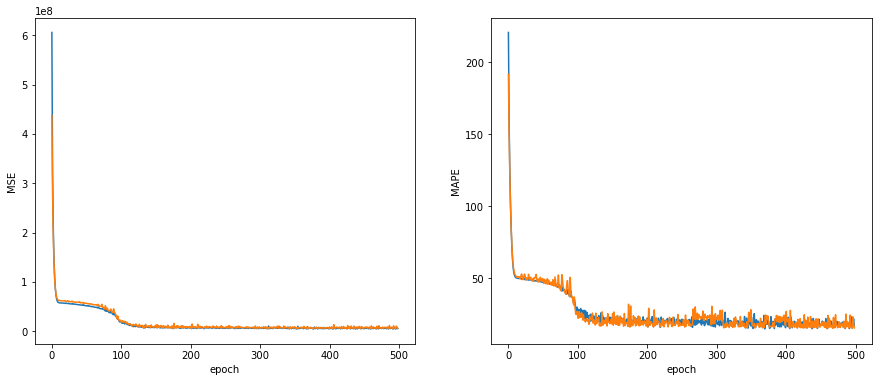

In [23]:
draw_history(history)

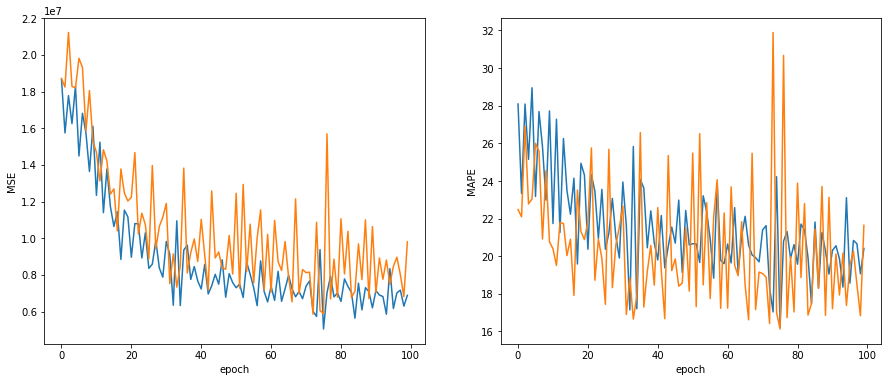

In [24]:
draw_history(history,sw=(100,200))

In [25]:
min(history.history['val_mape'])

15.186296463012695

14/14 [==============================] - 0s 2ms/step


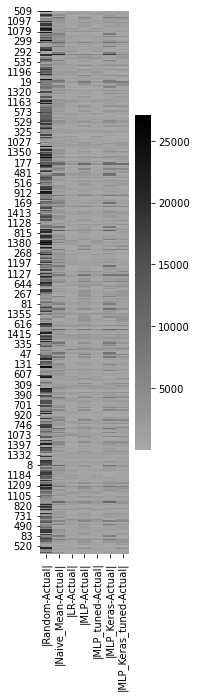

In [26]:
result_df['MLP_Keras_tuned'] = keras_model.predict(X_test)
result_df['|MLP_Keras_tuned-Actual|'] = abs(result_df.MLP_Keras_tuned-result_df.Actual)

table = result_df[['|Random-Actual|','|Naive_Mean-Actual|','|LR-Actual|',
                   '|MLP-Actual|','|MLP_tuned-Actual|','|MLP_Keras-Actual|','|MLP_Keras_tuned-Actual|']]

plt.figure(figsize=(2,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()

In [27]:
m='MLP_Keras_tuned'

metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100

metric_df

,Random,Naive_Mean,LR,MLP,MLP_tuned,MLP_Keras,MLP_Keras_tuned
ME,-7824.392885,-79.93425,101.679615,791.117902,132.046176,1063.664113,631.394189
RMSE,11943.44647,3560.136378,1247.107503,2251.011827,1258.040377,3277.575831,2203.149625
MAE,9717.427744,2616.745368,966.948202,1699.572476,988.123084,2186.430339,1641.942183
MAPE,103.879074,24.851242,9.659892,15.187355,9.956320,18.269077,14.968763


# Course Big Piture

## Previous Videos

- YouTube Video: [Gradient Descent with an Example](https://youtu.be/NTq6ZPyNW_k)
- YouTube Video: [Model vs Solver | Model and solve a linear classification problem](https://youtu.be/8l6S-o1UHII)

## This video

- Deep Learning Prediction via Keras and Tensorflow

## Next Videos

- What is Loss function and how to select it?
- What is activation, why it matters?
- Why overfitting is a blessing for deep learning and how we use it? Goining over the most important strategies of dealing with overfitting. 
- The proven steps to meanigfully use deep learning 
- Convolution and Computer Vision - CNN
- Time Serries and Recurrent Neural Networks
- Mixining various networks

